# Project Title
### Utilizing Machine Learning to Forecast the Probability of Successfully Collecting Debts by Analyzing Statute-Barred Status

## Problem Statement:
#### In the realm of debt collection, the ability to discern which accounts are statute-barred—thus potentially unrecoverable—holds immense significance. This project endeavors to develop a sophisticated machine-learning model aimed at accurately predicting the probability of successfully collecting debts by meticulously examining the statute-barred status of each account.
#### Given a dataset encompassing a multitude of attributes including original creditor information, account IDs, current balances, purchase dates, and a wealth of other pertinent features, the objective is to construct a predictive model that excels in identifying accounts where the statute barred status may influence the likelihood of debt retrieval.
#### The focal point of this endeavor centers on the IsStatBarred field, which serves as the pivotal target variable for classification. 



## Data Definition
- EntityID: Unique identifier for each entry.
- OriginalCreditor[Redacted]: Name of the original creditor, with sensitive information redacted.
- AccountID: Unique identifier for the account.
- CurrentBalance: The current balance of the account.
- DebtLoadPrincipal: The principal amount of the debt load.
- BalanceAtDebtLoad: The balance at the time of debt load.
- PurchasePrice: The price at which the debt was purchased.
- ProductOrDebtType: Type of product or debt.
- CollectionStatus: Status of the debt collection
- CloseDate: The date when the account was closed.
- Closure Reason: Reason for closing the account.
- InBankruptcy: Indicates if the account is involved in bankruptcy.
- AccountInsolvencyType: Type of insolvency related to the account.
- CustomerInsolvencyType: Type of insolvency related to the customer.
- IsLegal: Indicates if legal action has been taken.
- Interest Rate: Interest rate associated with the debt.
- LastPaymentAmount: Amount of the last payment made.
- LastPaymentMethod: Method used for the last payment.
- NumLiableParties: Number of liable parties associated with the account.
- CustomerAge: Age of the customer.
- NumPhones: Number of phone contacts associated with the customer.
- NumEmails: Number of email contacts associated with the customer.
- NumAddresses: Number of addresses associated with the customer.
- IsStatBarred: Indicates if the debt is statute-barred. (target variable)


### Data Structure
- Rows- 406424
- Columns- 22

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

#### Loading the data

In [2]:
dataset = pd.read_excel('Company_x.xlsx')
df = dataset.copy()

In [3]:
df.head()

,EntityID,OriginalCreditor[Redacted],AccountID,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,...,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,932,Creditor 1,3677,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,...,NaN,NaN,Y,10.00,Cheque,1.0,53.0,0,0,1
1,160,Creditor 2,4276,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,...,NaN,NaN,N,NaN,NaN,1.0,NaN,0,0,1
2,932,Creditor 1,8525,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,...,NaN,NaN,N,5.37,Cheque,1.0,NaN,1,0,1
3,160,Creditor 2,9859,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,Y,...,NaN,NaN,N,NaN,NaN,1.0,NaN,1,0,1
4,932,Creditor 1,12807,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,...,NaN,NaN,Y,5.00,Cheque,1.0,46.0,2,0,1


#### Data Verification

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  float64
 4   DebtLoadPrincipal           406423 non-null  float64
 5   BalanceAtDebtLoad           406423 non-null  float64
 6   PurchasePrice               403731 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   IsStatBarred                406423 non-null  object 
 10  ClosureReason               9030 non-null    object 
 11  InBankruptcy                406423 non-null  object 
 12  AccountInsolvencyType       285 non-null     object 
 13  CustomerInsolv

#### Dropping the EntityID and AccountID column as it is not required to build the model.

In [5]:
df.drop(['EntityID', 'AccountID'], axis=1, inplace=True)

In [6]:
# rename columns
df.rename(columns={'OriginalCreditor[Redacted]':'OriginalCreditor_Redacted'}, inplace=True)

#### Data description for Numerical features.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CurrentBalance,406423.0,1301.866266,4030.513710,-7717.20,85.330,457.51,1159.365,441681.52
DebtLoadPrincipal,406423.0,1539.010928,4416.229311,0.00,246.970,619.00,1393.780,844343.00
BalanceAtDebtLoad,406423.0,1600.933847,4531.889319,0.00,249.875,630.74,1433.755,844343.00
PurchasePrice,403731.0,5.618606,5.441934,0.19,3.070,4.22,6.590,52.18
LastPaymentAmount,103977.0,283.896947,1119.842219,0.01,20.000,40.00,142.900,73131.84
NumLiableParties,406301.0,1.017145,0.132866,1.00,1.000,1.00,1.000,4.00
CustomerAge,376941.0,45.728061,12.950395,-41.00,36.000,44.00,54.000,133.00
NumPhones,406423.0,0.435652,0.714852,0.00,0.000,0.00,1.000,8.00
NumEmails,406423.0,0.208113,0.434321,0.00,0.000,0.00,0.000,5.00
NumAddresses,406423.0,0.847354,0.459690,0.00,1.000,1.00,1.000,7.00


#### Data description for Categorical features.

In [8]:
df.describe(include=object).T

,count,unique,top,freq
OriginalCreditor_Redacted,406423,52,Creditor 17,84768
ProductOrDebtType,406423,10,Utilities/Telco - Other,212158
CollectionStatus,406423,12,ACTIVE,169489
IsStatBarred,406423,2,Y,284548
ClosureReason,9030,14,Insolvent,5634
InBankruptcy,406423,2,N,398270
AccountInsolvencyType,285,5,LIQUIDATION_NOP,161
CustomerInsolvencyType,8531,13,BANKRUPT,3809
IsLegal,406423,2,N,396709
LastPaymentMethod,103977,9,Cheque,54154


## Data Cleaning and Preprocessing:
### Checking for missing values.

In [9]:
df.isnull().sum()

OriginalCreditor_Redacted         0
CurrentBalance                    0
DebtLoadPrincipal                 0
BalanceAtDebtLoad                 0
PurchasePrice                  2692
ProductOrDebtType                 0
CollectionStatus                  0
IsStatBarred                      0
ClosureReason                397393
InBankruptcy                      0
AccountInsolvencyType        406138
CustomerInsolvencyType       397892
IsLegal                           0
LastPaymentAmount            302446
LastPaymentMethod            302446
NumLiableParties                122
CustomerAge                   29482
NumPhones                         0
NumEmails                         0
NumAddresses                      0
dtype: int64

In [10]:
df.isnull().sum()/len(df) * 100

OriginalCreditor_Redacted     0.000000
CurrentBalance                0.000000
DebtLoadPrincipal             0.000000
BalanceAtDebtLoad             0.000000
PurchasePrice                 0.662364
ProductOrDebtType             0.000000
CollectionStatus              0.000000
IsStatBarred                  0.000000
ClosureReason                97.778177
InBankruptcy                  0.000000
AccountInsolvencyType        99.929876
CustomerInsolvencyType       97.900955
IsLegal                       0.000000
LastPaymentAmount            74.416556
LastPaymentMethod            74.416556
NumLiableParties              0.030018
CustomerAge                   7.254019
NumPhones                     0.000000
NumEmails                     0.000000
NumAddresses                  0.000000
dtype: float64

### CustomerAge column has some negative value, need to convert to positive values.

In [11]:
df[df['CustomerAge'] < 0]

,OriginalCreditor_Redacted,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,ClosureReason,InBankruptcy,AccountInsolvencyType,CustomerInsolvencyType,IsLegal,LastPaymentAmount,LastPaymentMethod,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
9029,Creditor 7,0.00,36.37,46.00,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,40.00,Cheque,1.0,-3.0,1,0,1
11172,Creditor 7,0.00,36.00,45.29,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,45.29,Cheque,1.0,-3.0,1,0,1
15502,Creditor 7,0.00,53.00,65.29,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,65.29,Cheque,1.0,-28.0,0,0,1
15609,Creditor 7,47.65,38.00,47.65,4.22,Other,PASSIVE,Y,NaN,N,NaN,NaN,N,NaN,NaN,1.0,-29.0,1,0,1
22293,Creditor 11,0.00,1181.42,1181.42,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,74.82,Cheque,1.0,-20.0,1,0,1
23433,Creditor 7,0.00,80.00,97.06,4.22,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,97.06,Cheque,1.0,-22.0,1,0,1
23983,Creditor 10,18.16,662.69,808.16,4.96,Other,PASSIVE,Y,NaN,N,NaN,NaN,N,10.00,Cheque,1.0,-30.0,0,0,1
24652,Creditor 10,0.00,104.83,127.84,4.96,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,10.00,Cheque,1.0,-20.0,2,0,1
24724,Creditor 10,0.00,4780.00,5829.27,4.96,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,5829.27,Cheque,1.0,-28.0,3,0,1
25313,Creditor 10,0.00,343.90,419.39,4.96,Other,PAID_IN_FULL,N,NaN,N,NaN,NaN,N,419.39,Cheque,1.0,-28.0,2,0,1


In [12]:
df['CustomerAge'] = df['CustomerAge'].abs()

In [13]:
df['CustomerAge'].describe()

count    376941.000000
mean         45.730273
std          12.942580
min           1.000000
25%          36.000000
50%          44.000000
75%          54.000000
max         133.000000
Name: CustomerAge, dtype: float64

## Missing Values Treatment
### ClosureReason, AccountInsolvencyType, CustomerInsolvencyType, LastPaymentAmount and LastPaymentMethod has more than 75% missing values.
### Dropping these columns to avoid bias.

In [14]:
df = df.drop(['ClosureReason', 'AccountInsolvencyType', 'CustomerInsolvencyType', 'LastPaymentAmount', 'LastPaymentMethod'], axis=1)

In [15]:
df.head()

,OriginalCreditor_Redacted,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
0,Creditor 1,0.0,1160.20,1160.20,4.22,Other,PAID_IN_FULL,N,N,Y,1.0,53.0,0,0,1
1,Creditor 2,182.9,182.90,182.90,4.22,Other,CANCELLED_WITHDRAWN,Y,N,N,1.0,NaN,0,0,1
2,Creditor 1,0.0,538.57,538.57,4.22,Other,PAID_IN_FULL,N,N,N,1.0,NaN,1,0,1
3,Creditor 2,8279.5,8279.50,8279.50,4.22,Other,PASSIVE,Y,N,N,1.0,NaN,1,0,1
4,Creditor 1,0.0,523.00,523.00,4.22,Other,PAID_IN_FULL,Y,N,Y,1.0,46.0,2,0,1


### PurchasePrice and NumLiableParties have less than 1% missing values and CustomerAge has 7% missing values.
### Filling missing values with the median method.

In [16]:
df['PurchasePrice'] = df['PurchasePrice'].fillna(df['PurchasePrice'].median())

df['NumLiableParties'] = df['NumLiableParties'].fillna(df['NumLiableParties'].median())

df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].median)

In [17]:
df.isnull().sum()

OriginalCreditor_Redacted    0
CurrentBalance               0
DebtLoadPrincipal            0
BalanceAtDebtLoad            0
PurchasePrice                0
ProductOrDebtType            0
CollectionStatus             0
IsStatBarred                 0
InBankruptcy                 0
IsLegal                      0
NumLiableParties             0
CustomerAge                  0
NumPhones                    0
NumEmails                    0
NumAddresses                 0
dtype: int64

### Checking and dropping duplicate records

In [18]:
df[df.duplicated()]

,OriginalCreditor_Redacted,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
168,Creditor 5,0.00,0.00,0.00,4.22,Other,PAID_IN_FULL,N,N,N,1.0,<bound method NDFrame._add_numeric_operations....,0,0,1
236,Creditor 7,23.00,20.70,23.00,4.22,Other,PASSIVE,Y,N,N,1.0,47.0,0,0,1
272,Creditor 7,20.00,18.00,20.00,4.22,Other,PASSIVE,Y,N,N,1.0,28.0,1,0,1
283,Creditor 7,23.00,20.70,23.00,4.22,Other,PASSIVE,Y,N,N,1.0,52.0,1,0,1
294,Creditor 7,45.00,40.50,45.00,4.22,Other,PASSIVE,Y,N,N,1.0,45.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357599,Creditor 48,1316.88,1197.16,1197.16,5.72,Utilities/Telco - Other,ACTIVE,Y,N,N,1.0,28.0,0,0,1
357799,Creditor 48,939.47,854.06,854.06,5.72,Utilities/Telco - Other,ACTIVE,Y,N,N,1.0,30.0,0,0,1
357822,Creditor 48,240.55,218.68,218.68,5.72,Utilities/Telco - Other,ACTIVE,Y,N,N,1.0,32.0,0,0,1
397085,Creditor 50,2205.14,2177.83,2177.83,7.38,Finance Company - Other,ACTIVE,N,N,N,2.0,<bound method NDFrame._add_numeric_operations....,0,1,1


In [19]:
df = df.drop_duplicates()

In [20]:
df.shape

(391182, 15)

In [21]:
# from dataprep.datasets import load_dataset
# from dataprep.eda import plot
# plot(df).show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391182 entries, 0 to 406422
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   OriginalCreditor_Redacted  391182 non-null  object 
 1   CurrentBalance             391182 non-null  float64
 2   DebtLoadPrincipal          391182 non-null  float64
 3   BalanceAtDebtLoad          391182 non-null  float64
 4   PurchasePrice              391182 non-null  float64
 5   ProductOrDebtType          391182 non-null  object 
 6   CollectionStatus           391182 non-null  object 
 7   IsStatBarred               391182 non-null  object 
 8   InBankruptcy               391182 non-null  object 
 9   IsLegal                    391182 non-null  object 
 10  NumLiableParties           391182 non-null  float64
 11  CustomerAge                391182 non-null  object 
 12  NumPhones                  391182 non-null  int64  
 13  NumEmails                  39

In [23]:
df['CustomerAge'].value_counts()

<bound method NDFrame._add_numeric_operations.<locals>.median of 0         53.0\n1          NaN\n2          NaN\n3          NaN\n4         46.0\n          ... \n406418    36.0\n406419    37.0\n406420    71.0\n406421    38.0\n406422    30.0\nName: CustomerAge, Length: 406423, dtype: float64>    26400
38.0                                                                                                                                                                                                                                                                                                   13893
37.0                                                                                                                                                                                                                                                                                                   13465
39.0                                                                                             

### Column "CustomerAge" has some string values, replacing those values with mode.

In [24]:
df['CustomerAge'] = pd.to_numeric(df['CustomerAge'], errors='coerce')

In [25]:
df['CustomerAge'].isnull().sum()

26400

In [26]:
df['CustomerAge'] = df['CustomerAge'].fillna(df['CustomerAge'].mode()[0])

In [27]:
df['CustomerAge'].value_counts()

38.0     40293
37.0     13465
39.0     12994
36.0     12506
40.0     12323
         ...  
6.0          1
7.0          1
132.0        1
115.0        1
119.0        1
Name: CustomerAge, Length: 118, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391182 entries, 0 to 406422
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   OriginalCreditor_Redacted  391182 non-null  object 
 1   CurrentBalance             391182 non-null  float64
 2   DebtLoadPrincipal          391182 non-null  float64
 3   BalanceAtDebtLoad          391182 non-null  float64
 4   PurchasePrice              391182 non-null  float64
 5   ProductOrDebtType          391182 non-null  object 
 6   CollectionStatus           391182 non-null  object 
 7   IsStatBarred               391182 non-null  object 
 8   InBankruptcy               391182 non-null  object 
 9   IsLegal                    391182 non-null  object 
 10  NumLiableParties           391182 non-null  float64
 11  CustomerAge                391182 non-null  float64
 12  NumPhones                  391182 non-null  int64  
 13  NumEmails                  39

# Exploratory Data Analysis (EDA) for Categorical Columns

In this section, we conduct an exploratory data analysis (EDA) for the categorical columns in the dataset, excluding the column 'OriginalCreditor_Redacted'. This analysis includes examining the unique values, their counts, and visualizing the distribution of each categorical variable.

## Unique Values and Counts

We start by investigating the unique values and their counts for each categorical column:
    
## Visualizations

Next, we create visualizations to understand the distribution of each categorical column. A bar plot is used to visualize the counts of each unique value.

## Univariate Analysis

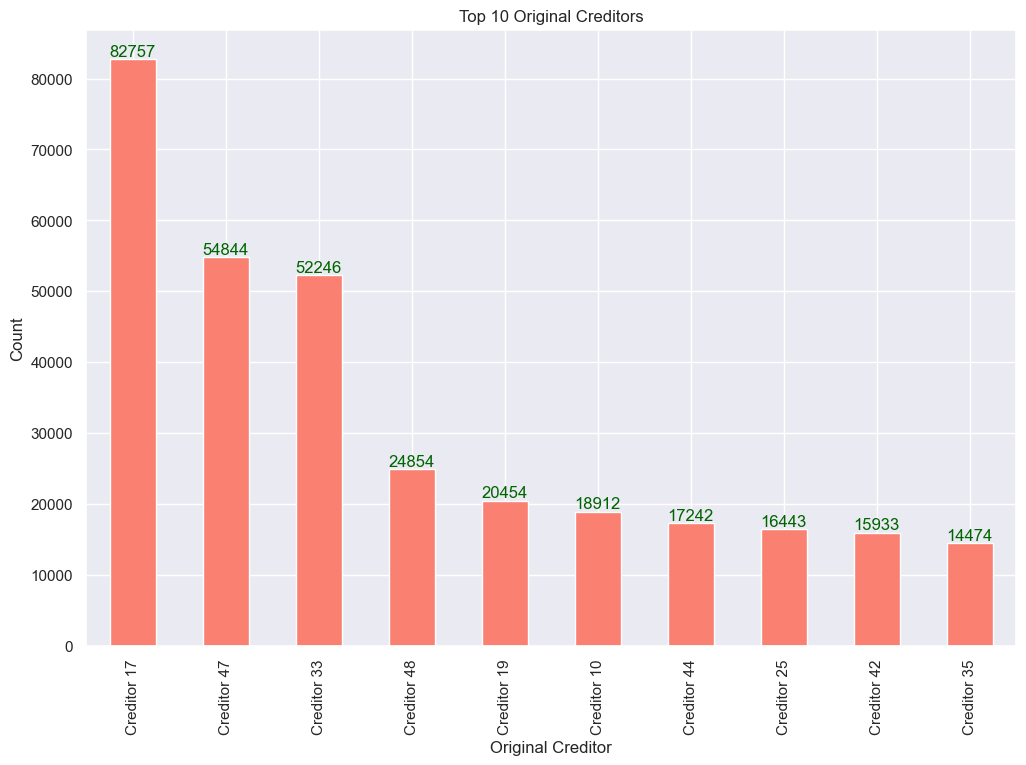

In [29]:
value_counts = df['OriginalCreditor_Redacted'].value_counts().head(10)

plt.figure(figsize=(12, 8))
ax = value_counts.plot(kind='bar', color='salmon')

for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', color='darkgreen')

plt.xlabel('Original Creditor')
plt.ylabel('Count')
plt.title('Top 10 Original Creditors')

plt.show()

In [30]:
OriginalCreditor_counts = df['OriginalCreditor_Redacted'].value_counts()

OriginalCreditor_frequency = {
    "Very High (>50000)": (OriginalCreditor_counts > 50000).sum(),
    "High (20000-49999)": ((OriginalCreditor_counts >= 20000) & (OriginalCreditor_counts <= 50000)).sum(),
    "Average (10000-19999)": ((OriginalCreditor_counts >= 10000) & (OriginalCreditor_counts < 20000)).sum(),
    "Low (1000-9999)": ((OriginalCreditor_counts > 1000) & (OriginalCreditor_counts < 10000)).sum(),
    "Very Low ": (OriginalCreditor_counts < 1000).sum()
}

OriginalCreditor_frequency

{'Very High (>50000)': 3,
 'High (20000-49999)': 2,
 'Average (10000-19999)': 7,
 'Low (1000-9999)': 13,
 'Very Low ': 27}

### Observations

- In the dataset, there are a total of 52 unique creditors.
- The distribution of the frequency of loan issuance is as follows:
    - A very high loan issuance frequency, with more than 50,000 loans given, is observed for 3 creditors.
    - A high loan issuance frequency, with 25 creditors giving between 20,000 and 50,000 loans.
    - An average loan issuance frequency, with 7 creditors giving between 10,000 and 20,000 loans.
    - 13 creditors have a lower loan issuance frequency, providing between 1,000 and 10,000 loans.
    - The majority of creditors, 27 in total, fall into the very low loan issuance category, giving less than 1,000 loans each.
    - Creditor 17 has issued the maximum number of loans, with a total of 82,764 loans given.

Column: ProductOrDebtType
Value Counts:
Utilities/Telco - Other    207008
Other                       74137
Finance Company - Other     48692
Store Cards                 17699
Credit Cards                16885
Bank - Other                13030
Residential Electricity      7693
Personal Loans               4309
Loans                        1259
Hire Purchase                 470
Name: ProductOrDebtType, dtype: int64
Visualizations:


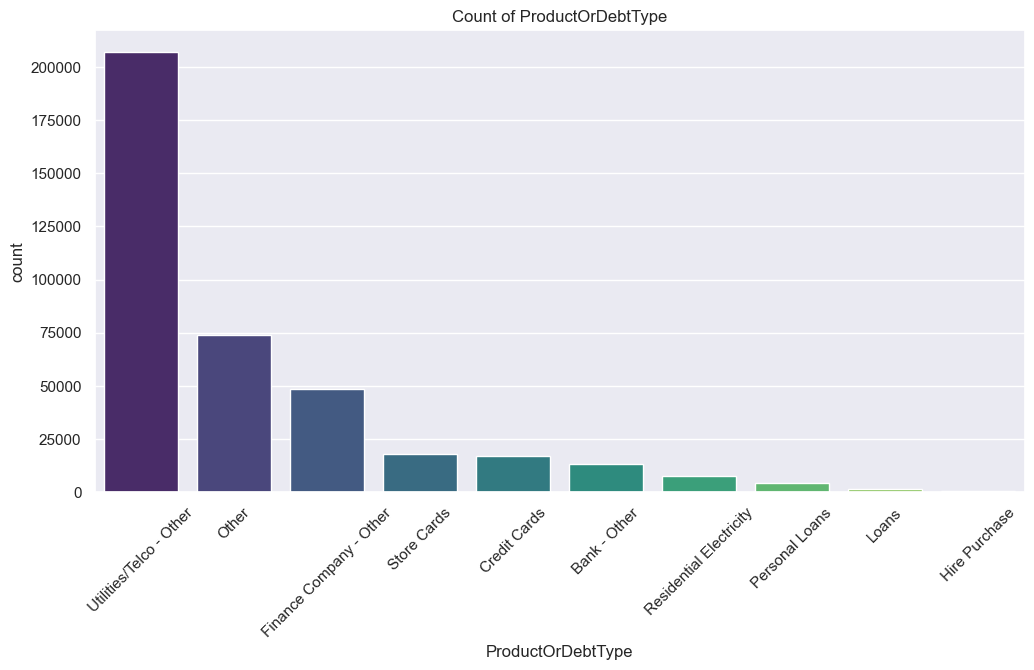


************************************************************************************************************************

Column: CollectionStatus
Value Counts:
ACTIVE                 167436
PASSIVE                128591
PAID_IN_FULL            65560
CLOSED                  13524
CANCELLED_WITHDRAWN      5401
UNDER_ARRANGEMENT        4237
SETTLED FOR LESS         4190
LEGAL                    1559
LEGAL_ARRANGEMENT         361
NON_COLLECTION            237
HOLDING                    59
PENDING                    27
Name: CollectionStatus, dtype: int64
Visualizations:


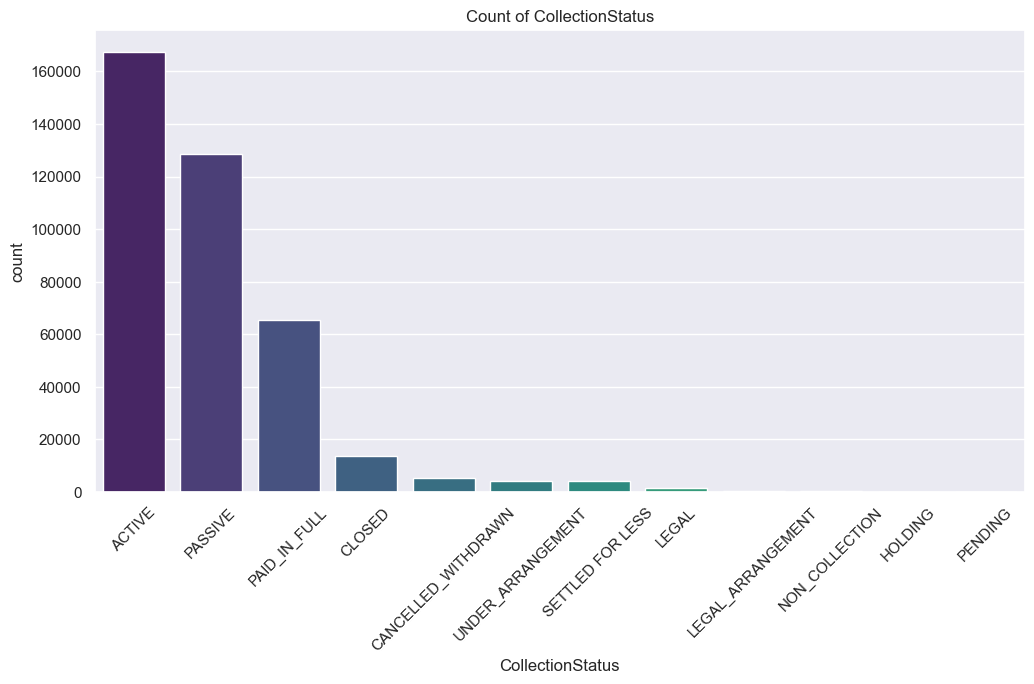


************************************************************************************************************************

Column: IsStatBarred
Value Counts:
Y    273013
N    118169
Name: IsStatBarred, dtype: int64
Visualizations:


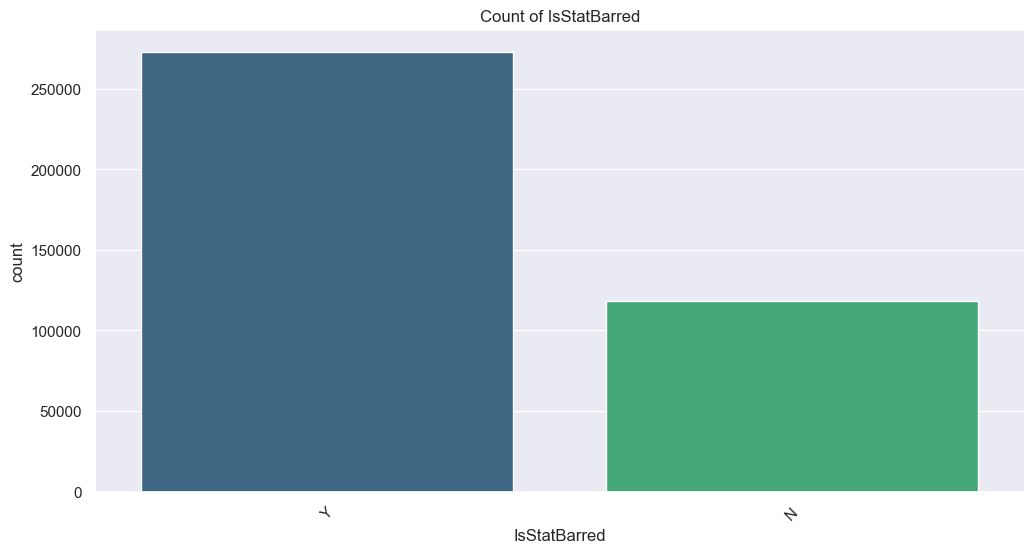


************************************************************************************************************************

Column: InBankruptcy
Value Counts:
N    383033
Y      8149
Name: InBankruptcy, dtype: int64
Visualizations:


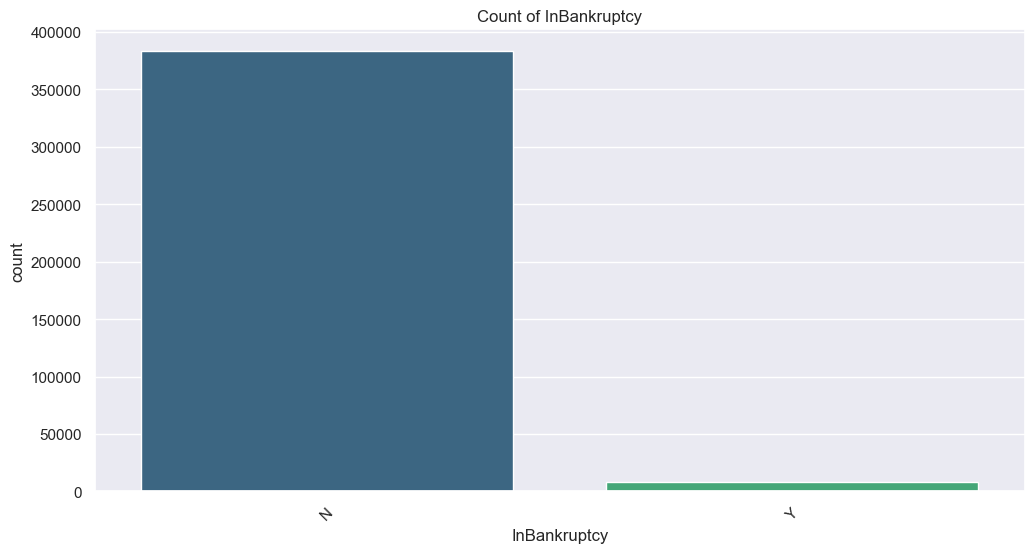


************************************************************************************************************************

Column: IsLegal
Value Counts:
N    381468
Y      9714
Name: IsLegal, dtype: int64
Visualizations:


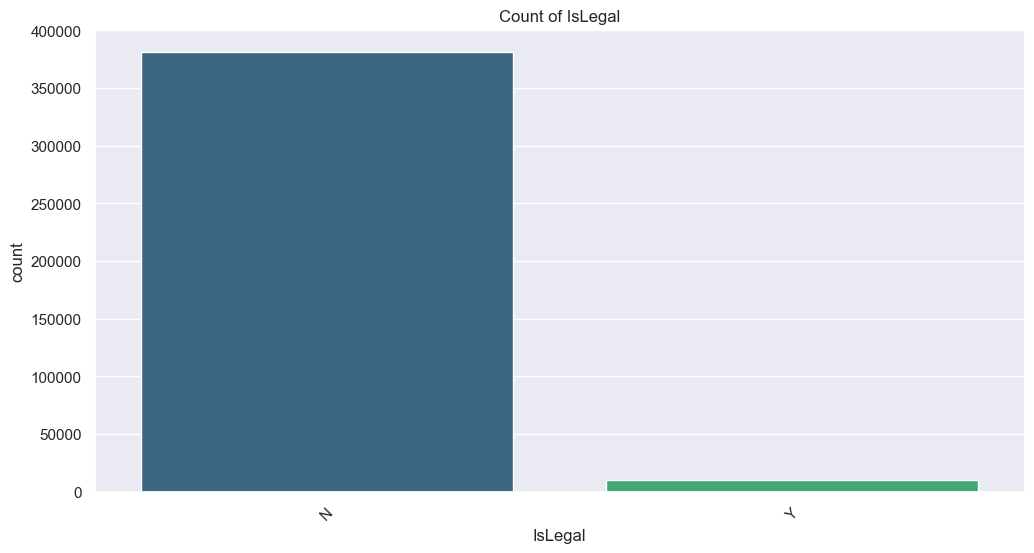


************************************************************************************************************************



In [31]:
# Get a list of categorical column names
categorical_columns = [col for col in df.select_dtypes(exclude='number').columns if col != 'OriginalCreditor_Redacted']

for column in categorical_columns:
    print(f"Column: {column}")
    
    print("Value Counts:")
    print(df[column].value_counts())
    
    print("Visualizations:")
    
    # Bar plot for categorical data
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, palette="viridis", order=df[column].value_counts().index)
    plt.title(f"Count of {column}")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()
    
    print("\n" + "*" * 120 + "\n")

# Exploratory Data Analysis (EDA) for Numerical Columns

## Descriptive Statistics

We start by analyzing the descriptive statistics for each numerical column:

  - Descriptive Statistics:
    - Mean: [mean_value]
    - Standard Deviation: [standard_deviation]
    - Minimum: [min_value]
    - 25th Percentile: [25th_percentile]
    - Median (50th Percentile): [median_value]
    - 75th Percentile: [75th_percentile]
    - Maximum: [max_value]

## Visualizations

Next, we create visualizations to better understand the distribution of each numerical column:

Column: CurrentBalance
Descriptive Statistics:
count    391182.000000
mean       1348.269899
std        4101.033242
min       -7717.200000
25%         110.900000
50%         490.650000
75%        1209.787500
max      441681.520000
Name: CurrentBalance, dtype: float64
Visualizations:


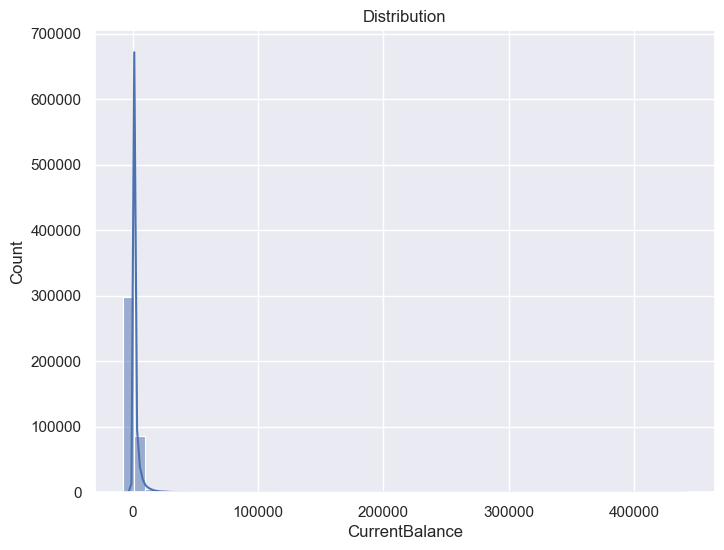

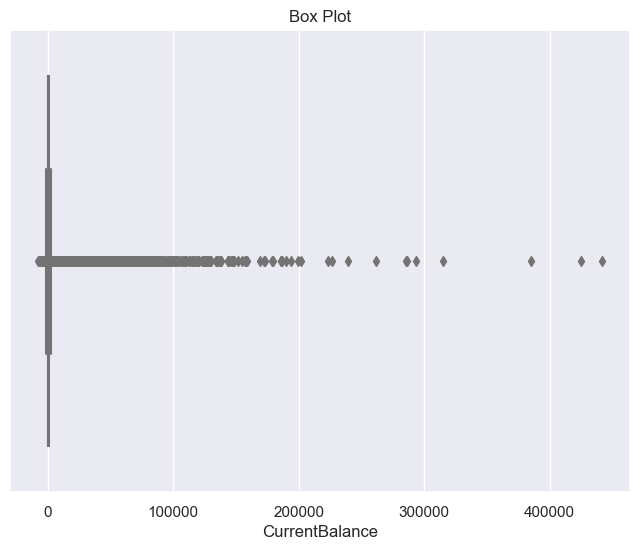


************************************************************************************************************************

Column: DebtLoadPrincipal
Descriptive Statistics:
count    391182.000000
mean       1594.376581
std        4492.048682
min           0.000000
25%         276.122500
50%         651.125000
75%        1450.212500
max      844343.000000
Name: DebtLoadPrincipal, dtype: float64
Visualizations:


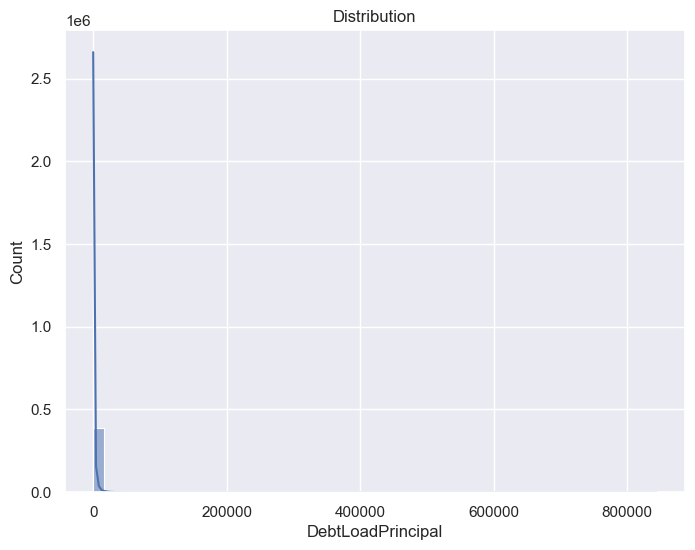

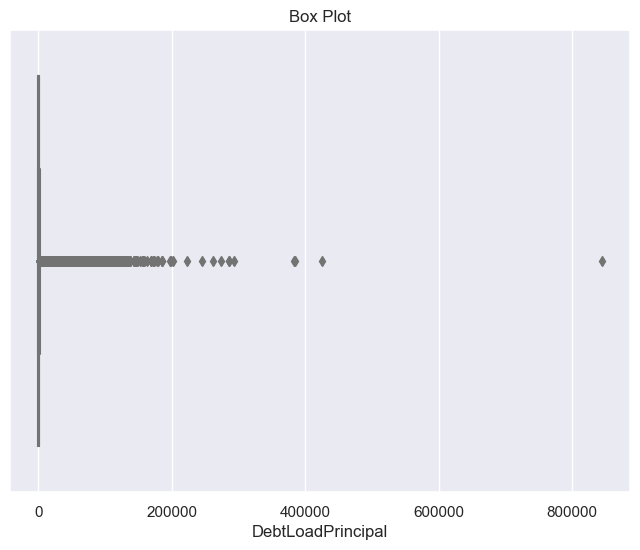


************************************************************************************************************************

Column: BalanceAtDebtLoad
Descriptive Statistics:
count    391182.000000
mean       1658.479188
std        4609.456770
min           0.000000
25%         279.770000
50%         664.660000
75%        1493.345000
max      844343.000000
Name: BalanceAtDebtLoad, dtype: float64
Visualizations:


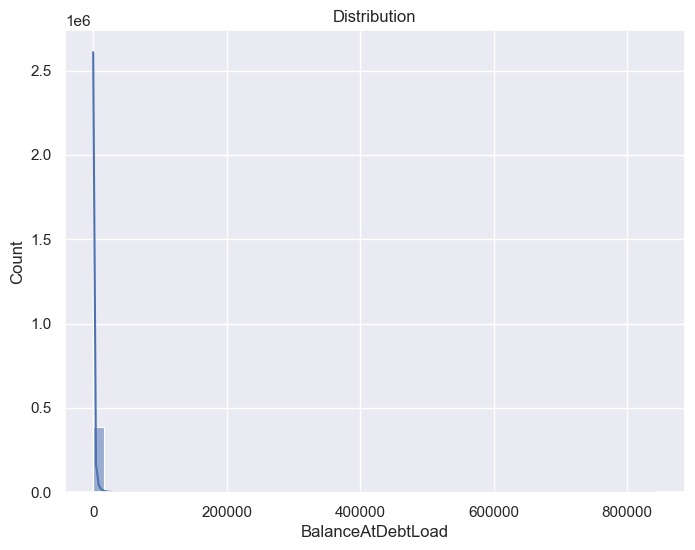

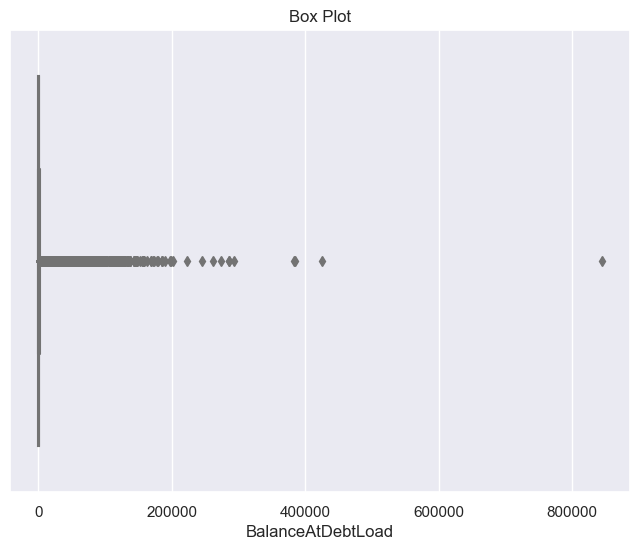


************************************************************************************************************************

Column: PurchasePrice
Descriptive Statistics:
count    391182.000000
mean          5.669735
std           5.516086
min           0.190000
25%           3.070000
50%           4.220000
75%           6.590000
max          52.180000
Name: PurchasePrice, dtype: float64
Visualizations:


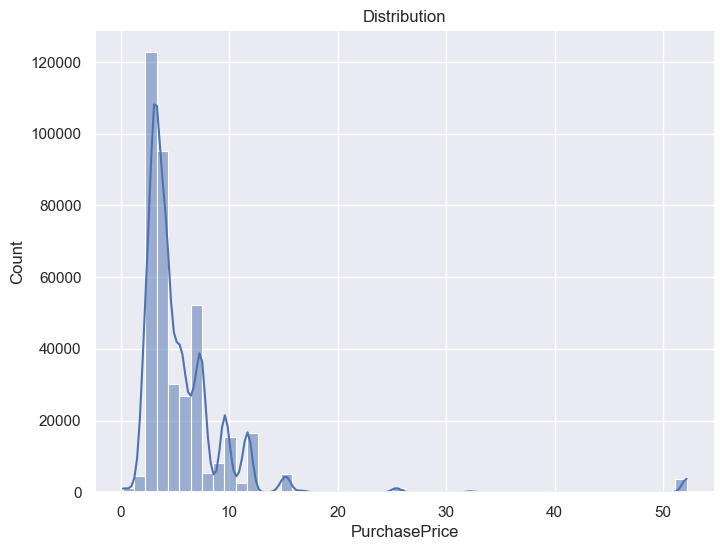

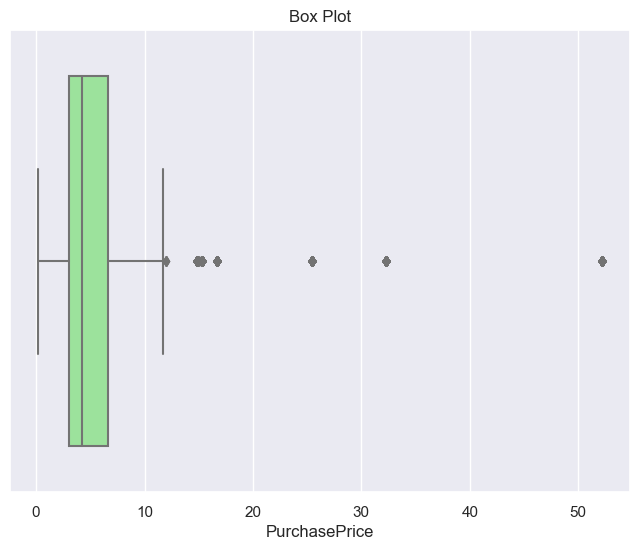


************************************************************************************************************************

Column: NumLiableParties
Descriptive Statistics:
count    391182.000000
mean          1.017800
std           0.135338
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: NumLiableParties, dtype: float64
Visualizations:


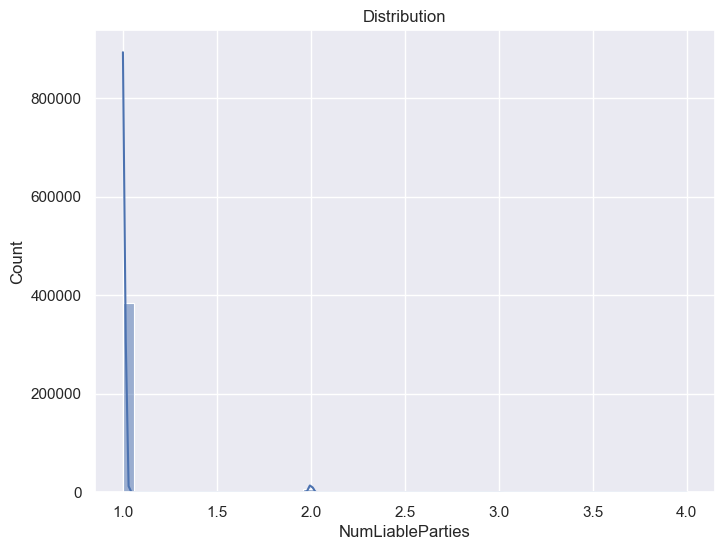

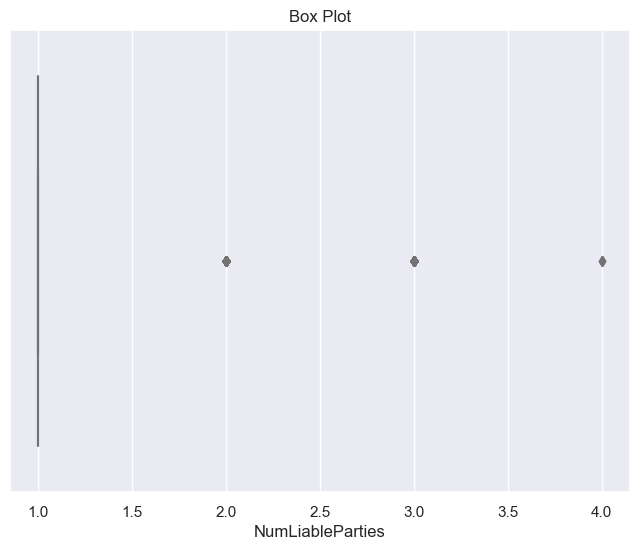


************************************************************************************************************************

Column: CustomerAge
Descriptive Statistics:
count    391182.000000
mean         45.427701
std          12.557282
min           1.000000
25%          37.000000
50%          42.000000
75%          53.000000
max         133.000000
Name: CustomerAge, dtype: float64
Visualizations:


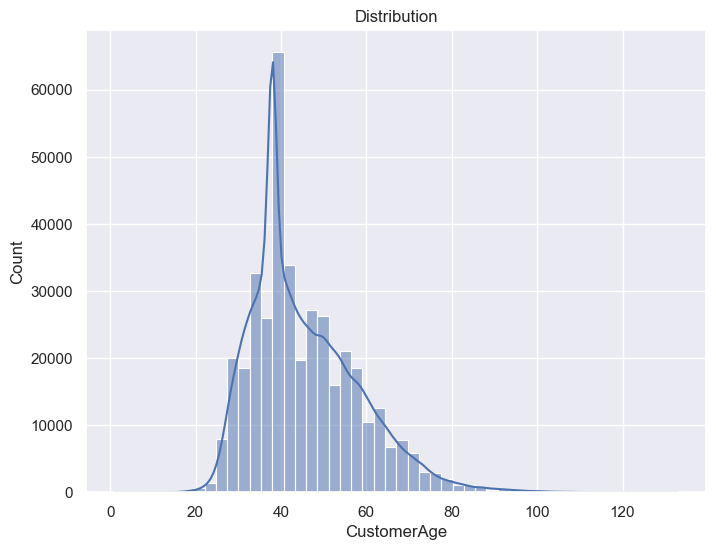

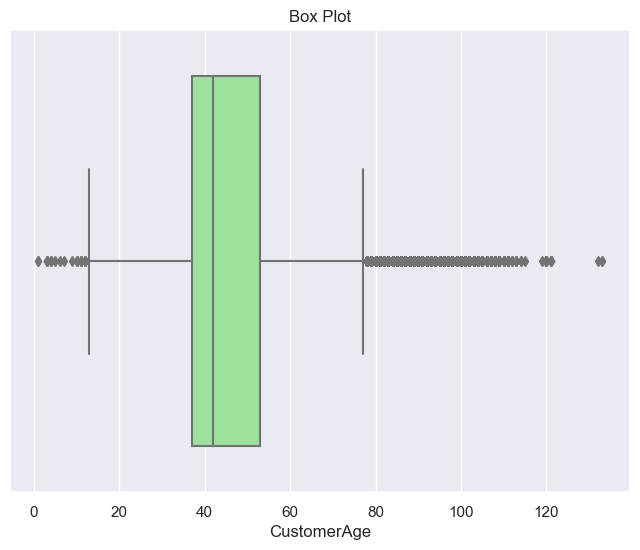


************************************************************************************************************************

Column: NumPhones
Descriptive Statistics:
count    391182.000000
mean          0.431582
std           0.718212
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: NumPhones, dtype: float64
Visualizations:


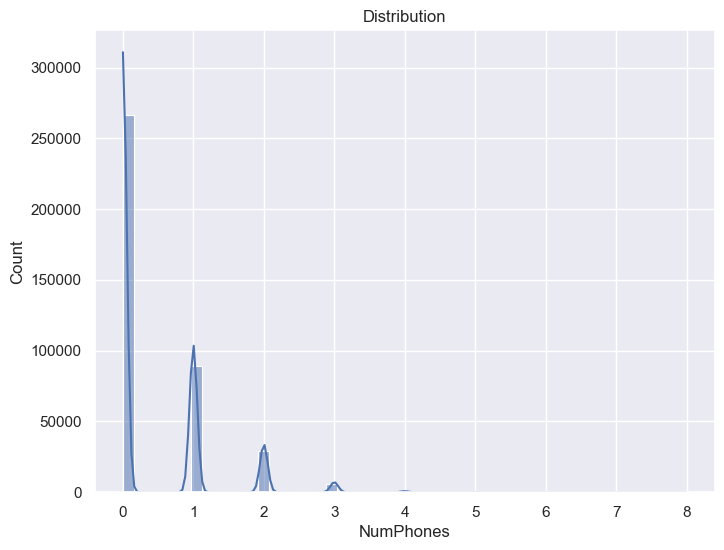

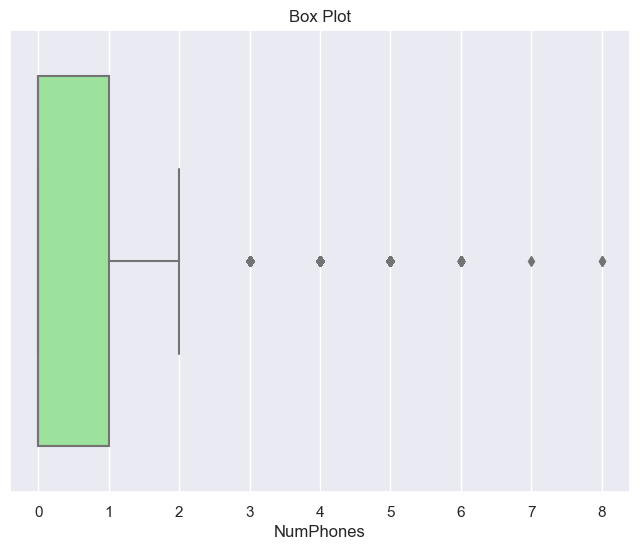


************************************************************************************************************************

Column: NumEmails
Descriptive Statistics:
count    391182.000000
mean          0.216109
std           0.440627
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: NumEmails, dtype: float64
Visualizations:


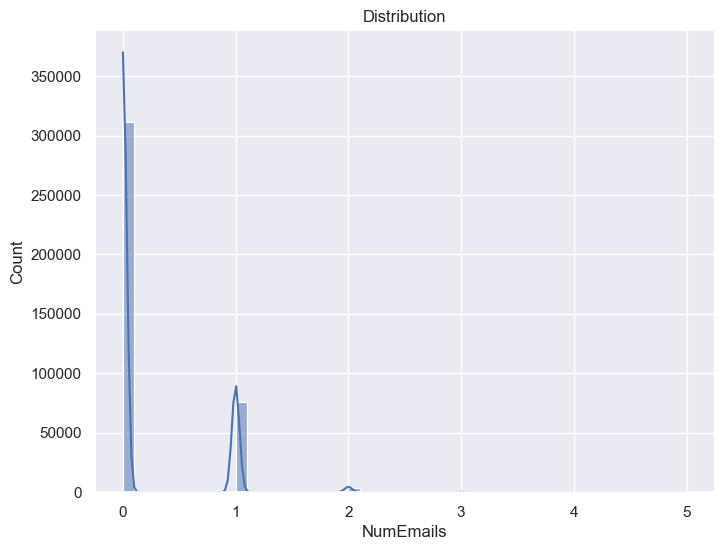

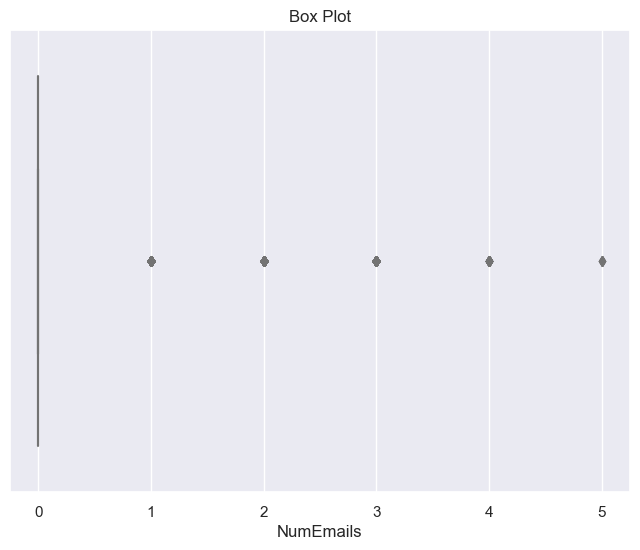


************************************************************************************************************************

Column: NumAddresses
Descriptive Statistics:
count    391182.000000
mean          0.843303
std           0.466101
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           7.000000
Name: NumAddresses, dtype: float64
Visualizations:


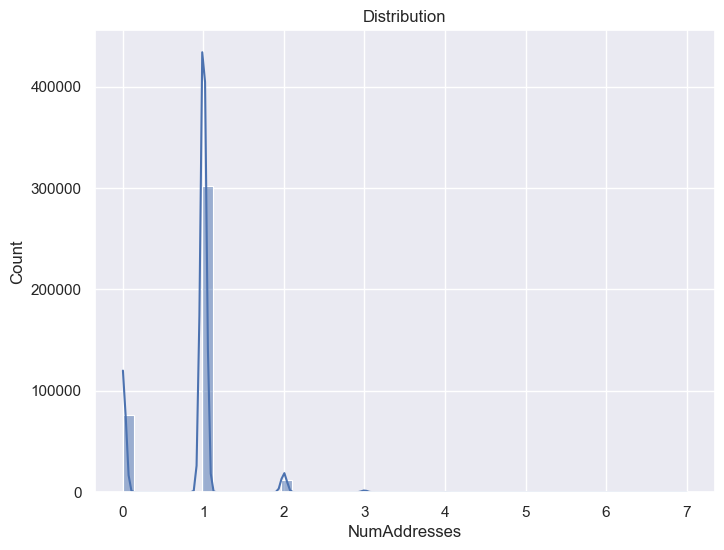

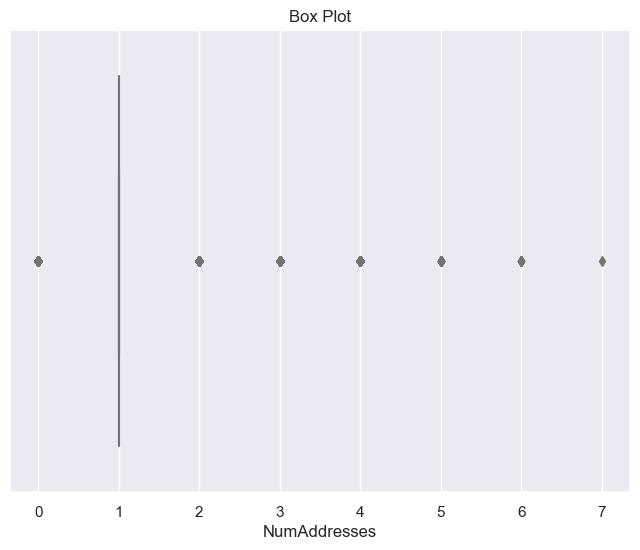


************************************************************************************************************************



In [32]:
# Get a list of numerical column names excluding 'FrequencyEncodedCreditor'
numerical_columns = [col for col in df.select_dtypes(include='number').columns]

for column in numerical_columns:
    print(f"Column: {column}")
    print("Descriptive Statistics:")
    print(df[column].describe())
    
    print("Visualizations:")
    
    # Histogram with KDE
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, bins=50)
    plt.title("Distribution")
    plt.show()
    
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], color='lightgreen')
    plt.title("Box Plot")
    plt.show()
    
    print("\n" + "*" * 120 + "\n")

## Skewness and Kurtosis

We calculate the skewness and kurtosis for each numerical column. Skewness measures the asymmetry of the data distribution, and kurtosis measures the tailedness of the distribution.

In [33]:
for column in numerical_columns:
    skewness = df[column].skew()
    kurtosis = df[column].kurt()
    print(f"Column: {column}")
    print(f"Skewness: {skewness}, Kurtosis: {kurtosis}")

Column: CurrentBalance
Skewness: 26.62215354984297, Kurtosis: 1573.4281216532445
Column: DebtLoadPrincipal
Skewness: 36.990481778658626, Kurtosis: 4145.274498577137
Column: BalanceAtDebtLoad
Skewness: 34.68968767585222, Kurtosis: 3745.3630745546347
Column: PurchasePrice
Skewness: 6.101634352410919, Kurtosis: 46.92720373982017
Column: NumLiableParties
Skewness: 7.817016681872681, Kurtosis: 64.32593624722494
Column: CustomerAge
Skewness: 0.9047286327915076, Kurtosis: 0.8490183101149613
Column: NumPhones
Skewness: 1.7714527034700067, Kurtosis: 3.2336625618642305
Column: NumEmails
Skewness: 1.8770250366324739, Kurtosis: 3.2077410351879605
Column: NumAddresses
Skewness: -0.18615495625670858, Kurtosis: 3.0383534783425086


## Log Transformation

We apply a log transformation to each numerical column to observe the impact on the data distribution. Log transformation is commonly used to reduce the impact of outliers and make the data more symmetric.

## Skewness and Kurtosis (after Transformation)

We calculate the skewness and kurtosis for each numerical column after applying the log transformation. These statistics help us understand the impact of the transformation on the data distribution.

Visualizations:


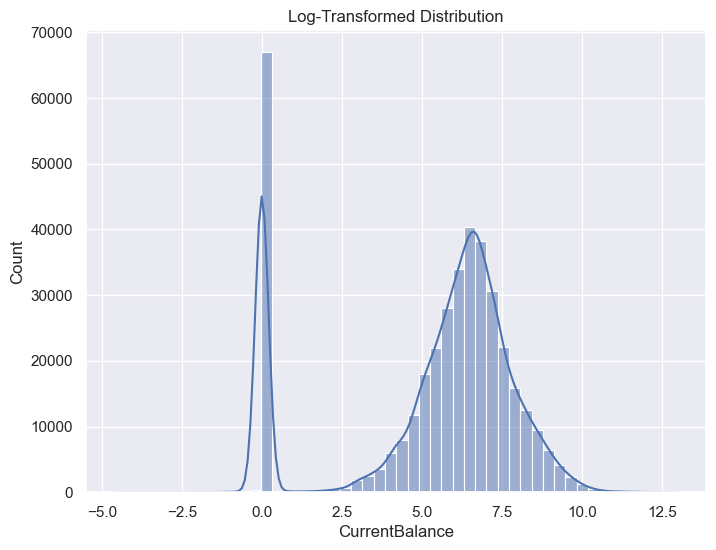

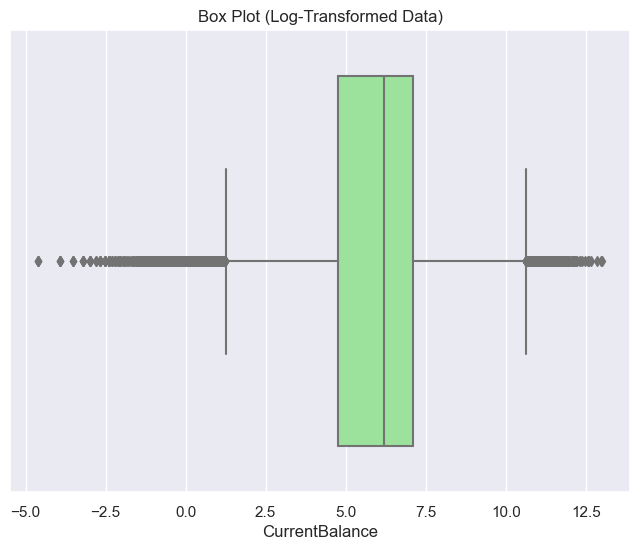

Skewness (after transformation): nan, Kurtosis (after transformation): nan

************************************************************************************************************************

Visualizations:


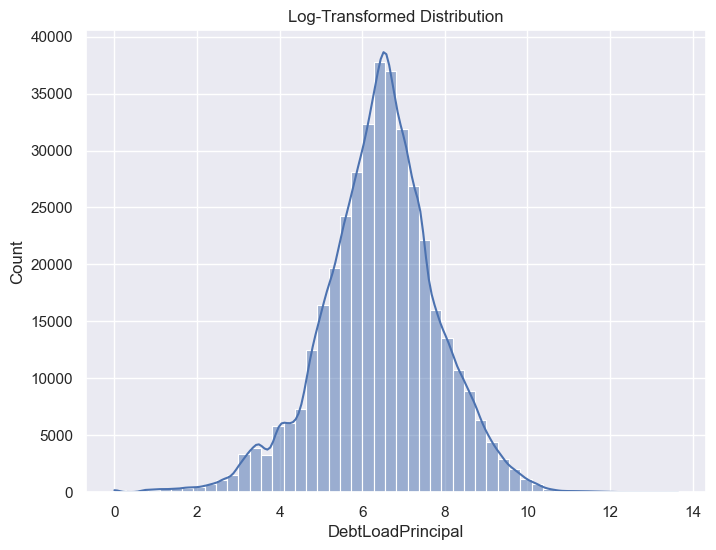

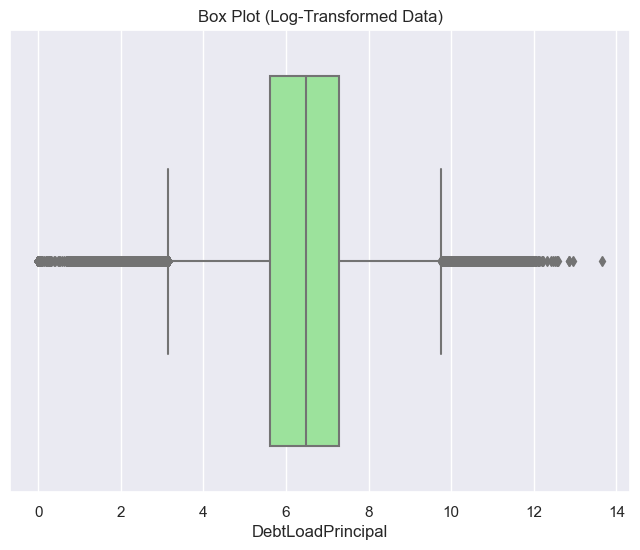

Skewness (after transformation): -0.2810033898642427, Kurtosis (after transformation): 0.8868342566333243

************************************************************************************************************************

Visualizations:


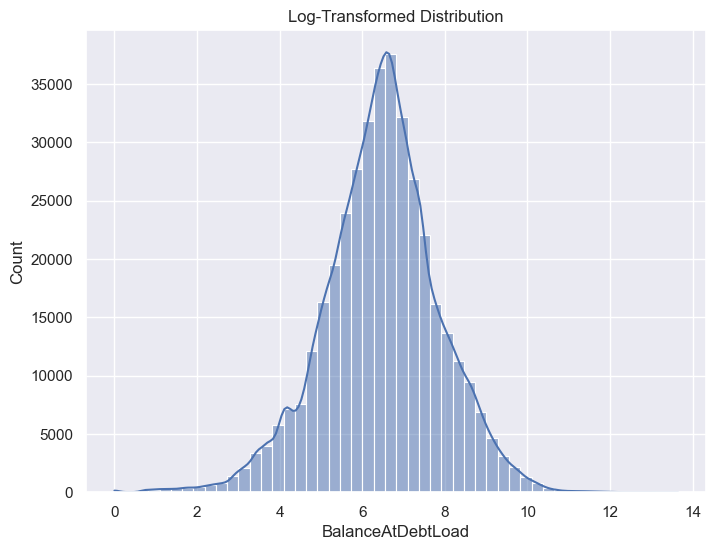

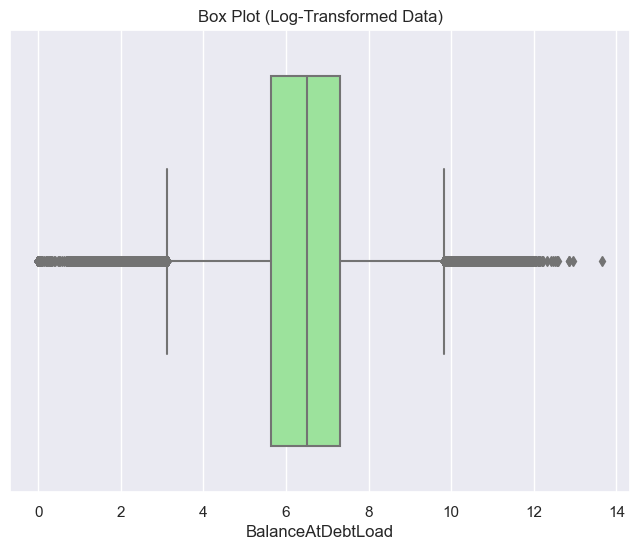

Skewness (after transformation): -0.23079871449967038, Kurtosis (after transformation): 0.8144872140231052

************************************************************************************************************************

Visualizations:


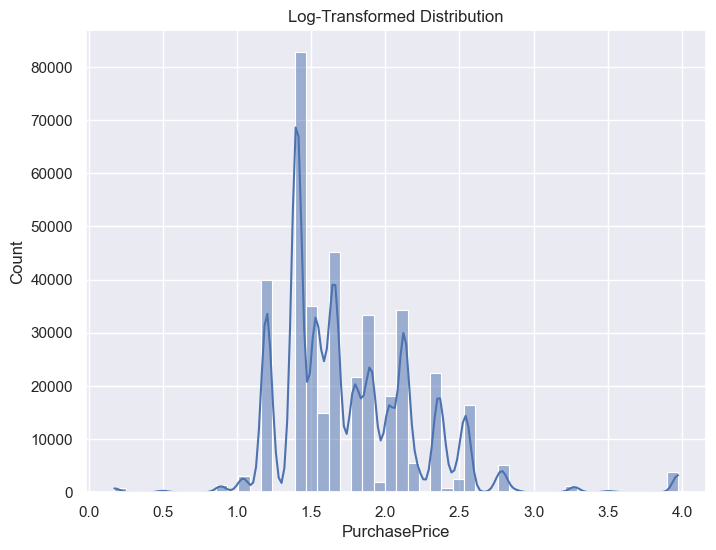

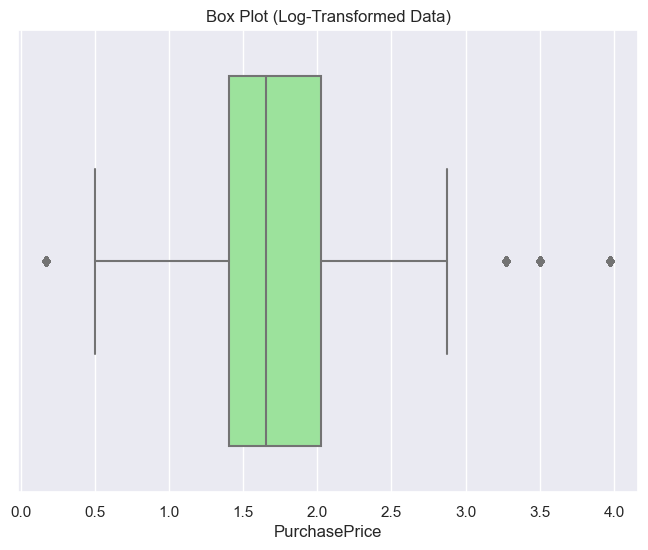

Skewness (after transformation): 1.3050613765025139, Kurtosis (after transformation): 3.8499949588631726

************************************************************************************************************************

Visualizations:


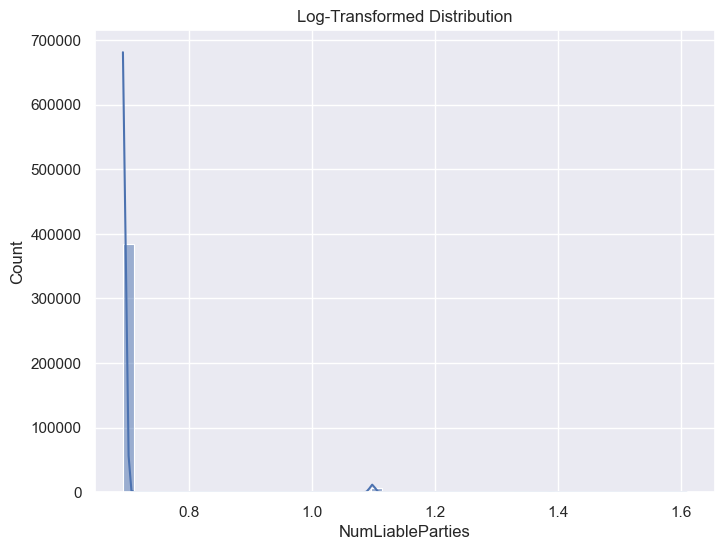

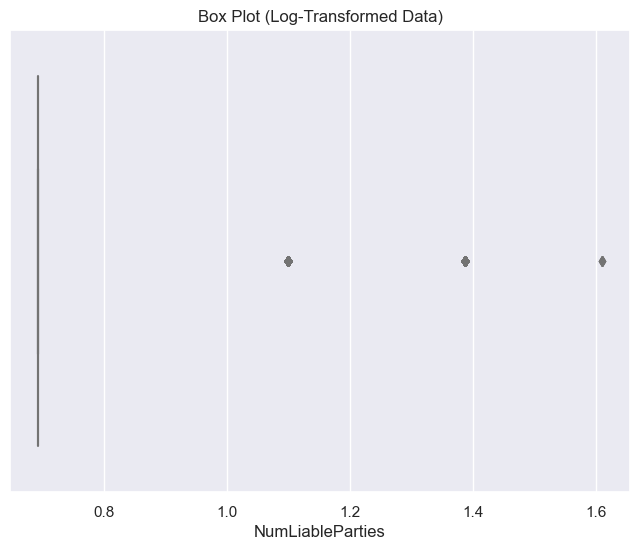

Skewness (after transformation): 7.576197150384891, Kurtosis (after transformation): 57.3081006153751

************************************************************************************************************************

Visualizations:


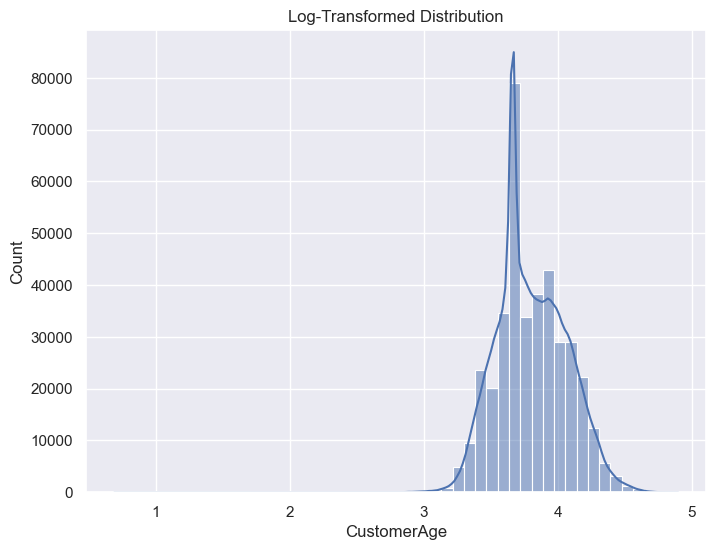

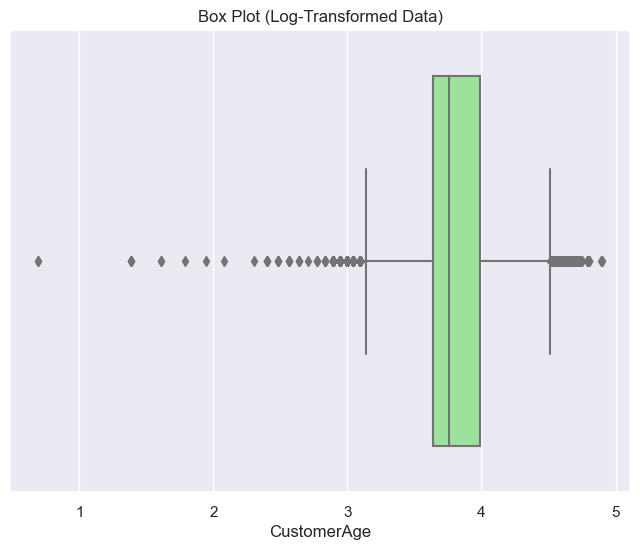

Skewness (after transformation): 0.22068035269827382, Kurtosis (after transformation): -0.07970723934648616

************************************************************************************************************************

Visualizations:


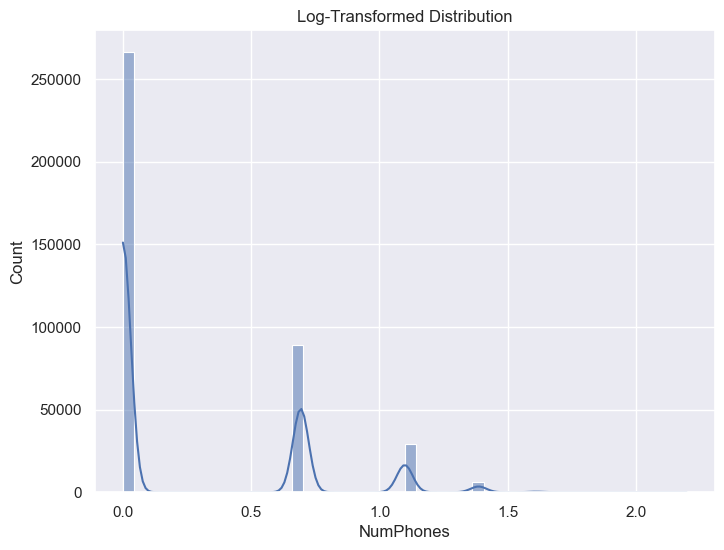

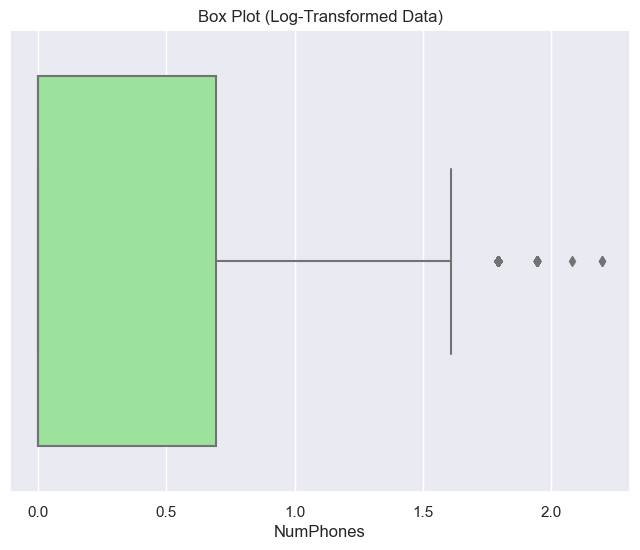

Skewness (after transformation): 1.1377158114835244, Kurtosis (after transformation): -0.07098628472994095

************************************************************************************************************************

Visualizations:


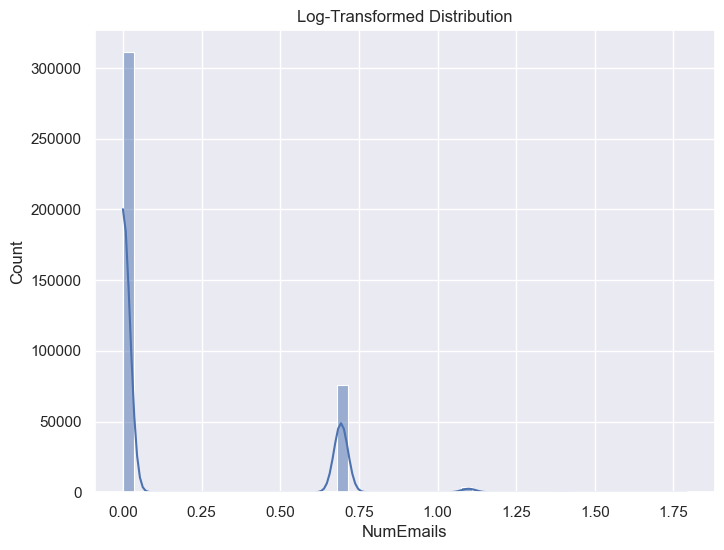

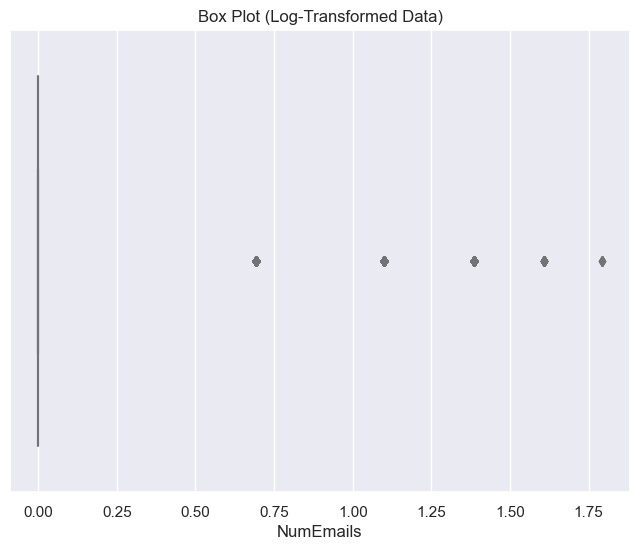

Skewness (after transformation): 1.5789763157014114, Kurtosis (after transformation): 0.8262837313641436

************************************************************************************************************************

Visualizations:


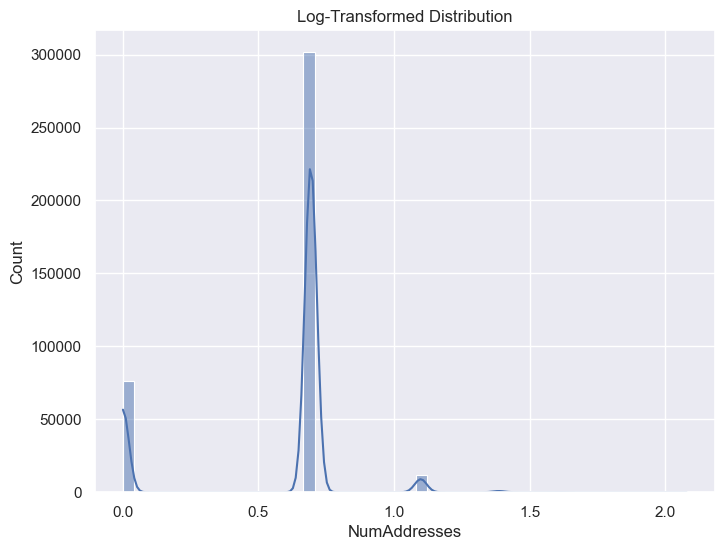

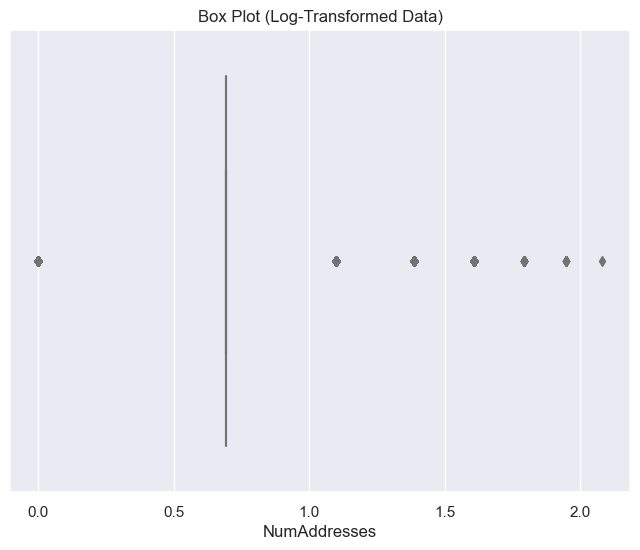

Skewness (after transformation): -1.1391155974269798, Kurtosis (after transformation): 0.4321981764471725

************************************************************************************************************************



In [34]:
for column in numerical_columns:
    
    print("Visualizations:")
    
    # Log Transformation
    log_transformed_data = np.log1p(df[column])  # Applying log transformation
    plt.figure(figsize=(8, 6))
    
    # Histogram with KDE for log-transformed data
    sns.histplot(log_transformed_data, kde=True, bins=50)
    plt.title("Log-Transformed Distribution")
    plt.show()
    
    # Box plot for log-transformed data
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=log_transformed_data, color='lightgreen')
    plt.title("Box Plot (Log-Transformed Data)")
    plt.show()
    
    skewness = stats.skew(log_transformed_data)
    kurtosis = stats.kurtosis(log_transformed_data)
    print(f"Skewness (after transformation): {skewness}, Kurtosis (after transformation): {kurtosis}")
    
    print("\n" + "*" * 120 + "\n")

## Outliers Analysis (IQR Method)

In this section, we perform an analysis of outliers for each numerical column using the Interquartile Range (IQR) method. The IQR method helps identify potential outliers by calculating the lower and upper bounds and then flagging data points that fall outside of these bounds.

### Outliers Analysis for Numerical Columns

We analyze the outliers for each numerical column using the IQR method:


In [35]:
numerical_columns = [col for col in df.select_dtypes(include='number').columns]

outlier_info = {}

for column in numerical_columns:
    # Calculate IQR, lower_bound, and upper_bound for each column
    Q1 = df[column].describe()['25%']
    Q3 = df[column].describe()['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for each column
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_info[column] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'num_outliers': outliers.shape[0],
        'outliers_description': outliers[column].describe()
    }

# Print outlier information for each numerical column
for column, info in outlier_info.items():
    print(f"Outliers Analysis for '{column}' (using IQR method):")
    print(f"- Based on the IQR method, there are {info['num_outliers']} considered as outliers.")
    print(f"- These outliers have an average {column} of approximately {info['outliers_description']['mean']:.2f}.")
    print(f"- The range for these outliers is from {info['outliers_description']['min']:.2f} to {info['outliers_description']['max']:.2f}.")
    print("\nOutliers Description:")
    print(info['outliers_description'])
    print("\n" + "*" * 120 + "\n")

Outliers Analysis for 'CurrentBalance' (using IQR method):
- Based on the IQR method, there are 41507 considered as outliers.
- These outliers have an average CurrentBalance of approximately 7691.42.
- The range for these outliers is from -7717.20 to 441681.52.

Outliers Description:
count     41507.000000
mean       7691.420182
std       10487.424987
min       -7717.200000
25%        3718.175000
50%        5167.120000
75%        8196.935000
max      441681.520000
Name: CurrentBalance, dtype: float64

************************************************************************************************************************

Outliers Analysis for 'DebtLoadPrincipal' (using IQR method):
- Based on the IQR method, there are 43285 considered as outliers.
- These outliers have an average DebtLoadPrincipal of approximately 8241.25.
- The range for these outliers is from 3211.53 to 844343.00.

Outliers Description:
count     43285.000000
mean       8241.251129
std       11347.413612
min        3

### Column "CustomerAge" has outlier values.
- Replacing all lower values by lower limit.
- Replacing all upper values with upper limit.

In [36]:
q1 = df['CustomerAge'].quantile(0.25)
q3 = df['CustomerAge'].quantile(0.75)

iqr = q3 - q1
ll = q1 - (1.5 * iqr)
ul = q3 + (1.5 * iqr)

ul_outlier = df[df['CustomerAge'] > ul].shape[0]
ll_outlier = df[df['CustomerAge'] < ll].shape[0]

total_outlier = ul_outlier + ll_outlier
percentage = total_outlier * 100 / df.shape[0]

print(ul_outlier)
print(ll_outlier)
print(total_outlier)
print(percentage)
print(ll)
print(ul)

6533
24
6557
1.6762018702292028
13.0
77.0


In [37]:
df[df['CustomerAge'] < 18]

,OriginalCreditor_Redacted,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses
6624,Creditor 7,0.00,37.00,46.63,4.22,Other,PAID_IN_FULL,N,N,N,1.0,10.0,1,0,1
7236,Creditor 7,0.00,37.00,46.63,4.22,Other,PAID_IN_FULL,N,N,N,1.0,4.0,1,0,1
9029,Creditor 7,0.00,36.37,46.00,4.22,Other,PAID_IN_FULL,N,N,N,1.0,3.0,1,0,1
11172,Creditor 7,0.00,36.00,45.29,4.22,Other,PAID_IN_FULL,N,N,N,1.0,3.0,1,0,1
27900,Creditor 7,17.26,45.00,59.38,4.22,Other,PASSIVE,Y,N,N,1.0,3.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304291,Creditor 47,153.08,139.16,139.16,2.32,Utilities/Telco - Other,ACTIVE,Y,N,N,1.0,13.0,0,0,0
306156,Creditor 47,199.16,181.05,181.05,2.32,Utilities/Telco - Other,ACTIVE,Y,N,N,1.0,13.0,0,0,1
306176,Creditor 47,304.82,277.11,277.11,2.32,Utilities/Telco - Other,ACTIVE,Y,N,N,1.0,13.0,0,0,1
308526,Creditor 47,920.76,837.05,837.05,2.32,Utilities/Telco - Other,ACTIVE,Y,N,N,1.0,10.0,0,0,0


### Here the lower bound is 13 and Lenders typically require borrowers to be at least 18 years old and have a credit history, steady income, and other financial qualifications in order to qualify for a loan.
### So, we are going to change the lower bound to 18.

In [38]:
ll = 18

# Set upper bounds for CustomerAge
df.loc[df['CustomerAge'] > ul, 'CustomerAge'] = ul

# Set lower bounds for CustomerAge
df.loc[df['CustomerAge'] < ll, 'CustomerAge'] = ll

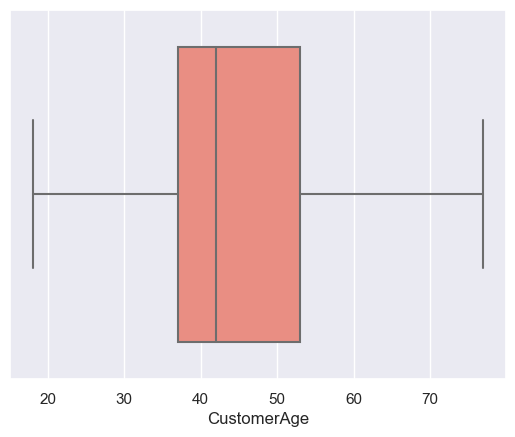

In [39]:
sns.boxplot(df['CustomerAge'], color = 'salmon')
plt.show()

In [40]:
df.columns

Index(['OriginalCreditor_Redacted', 'CurrentBalance', 'DebtLoadPrincipal',
       'BalanceAtDebtLoad', 'PurchasePrice', 'ProductOrDebtType',
       'CollectionStatus', 'IsStatBarred', 'InBankruptcy', 'IsLegal',
       'NumLiableParties', 'CustomerAge', 'NumPhones', 'NumEmails',
       'NumAddresses'],
      dtype='object')

## EDA Multivariate Analysis

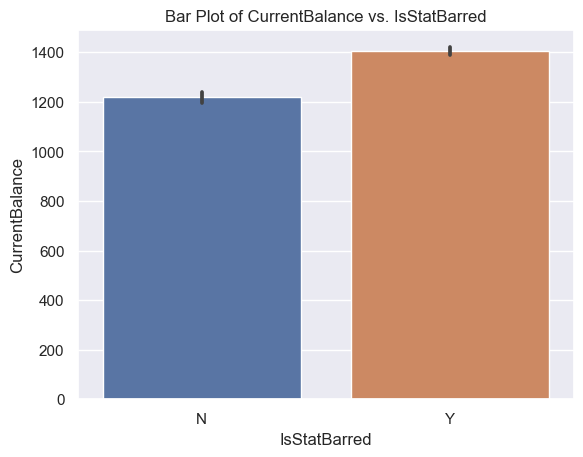

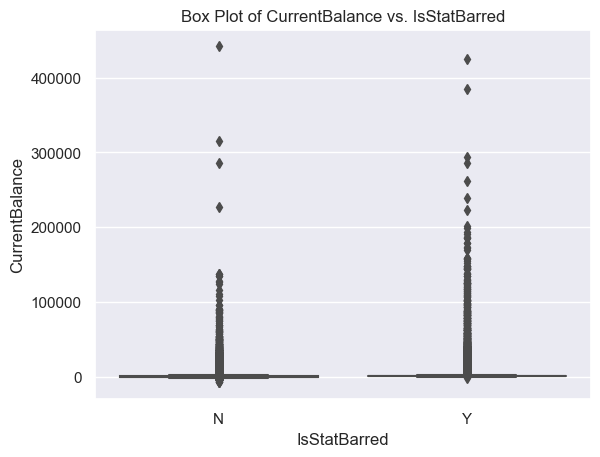

************************************************************************************************************************


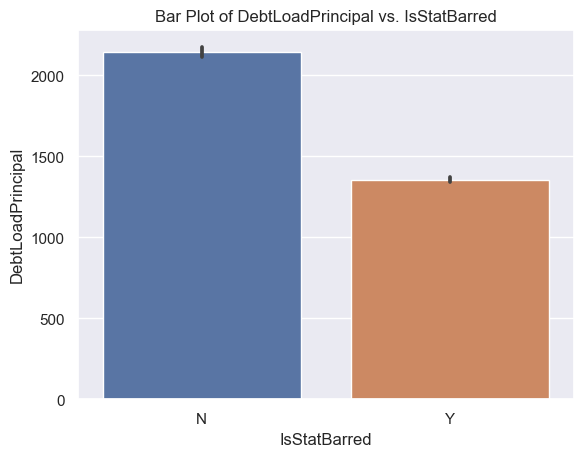

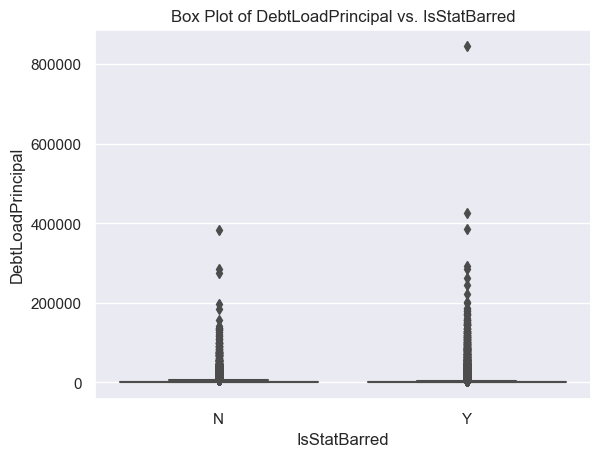

************************************************************************************************************************


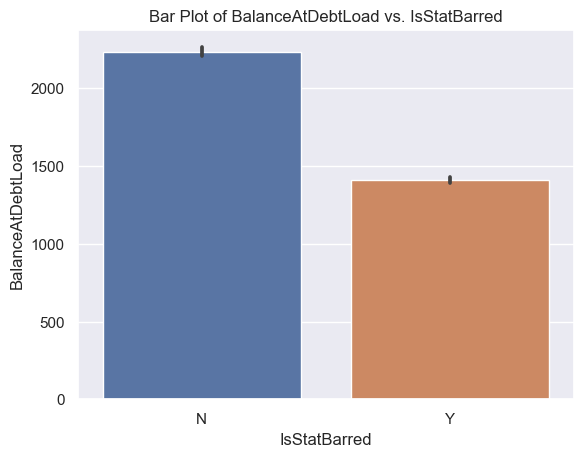

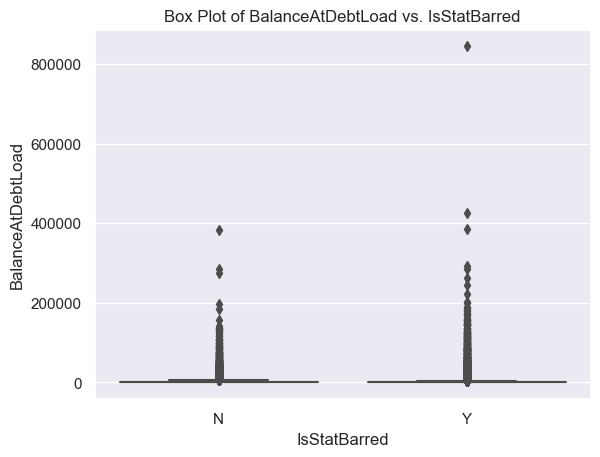

************************************************************************************************************************


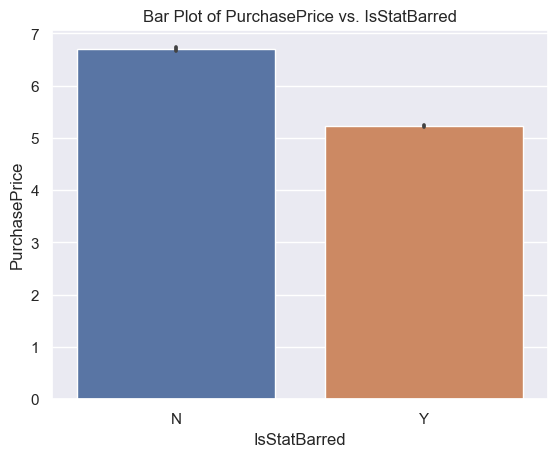

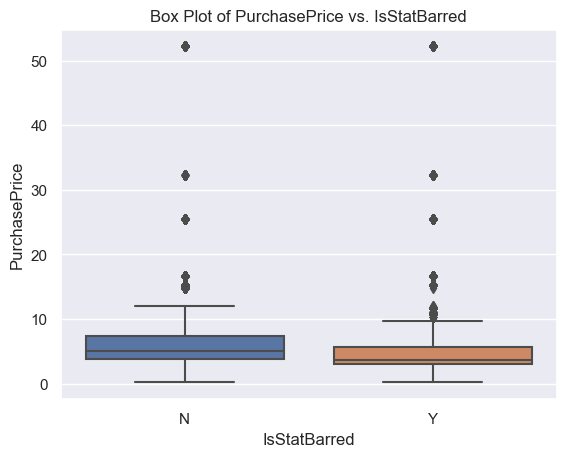

************************************************************************************************************************


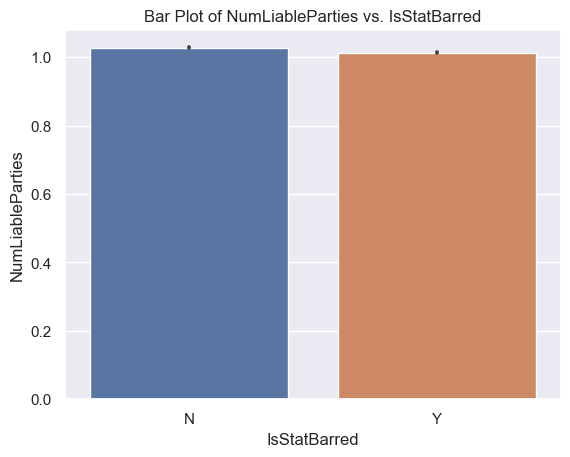

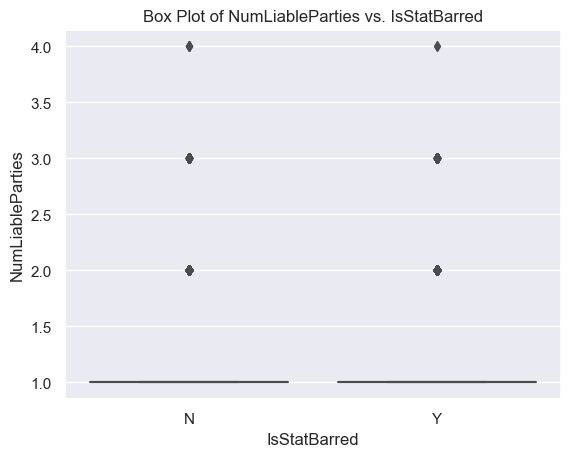

************************************************************************************************************************


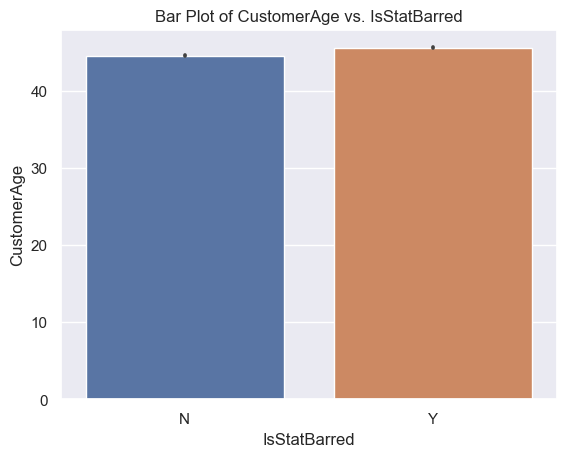

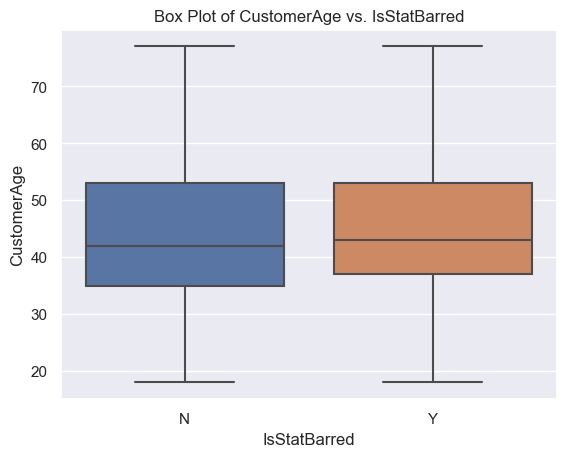

************************************************************************************************************************


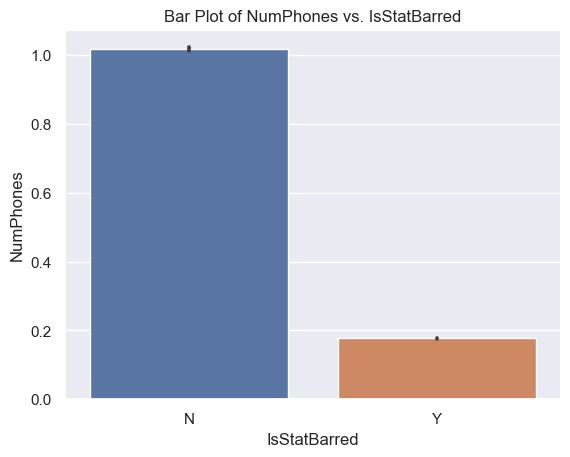

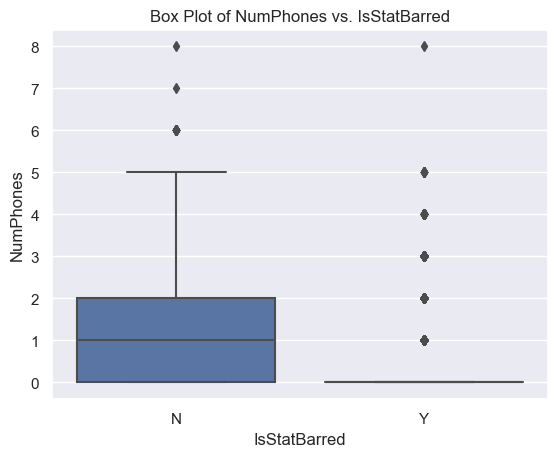

************************************************************************************************************************


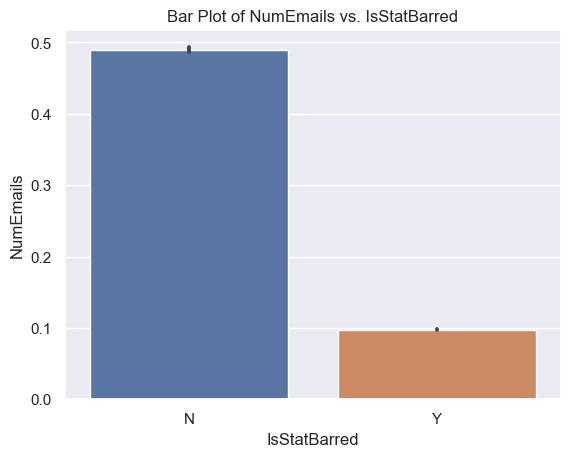

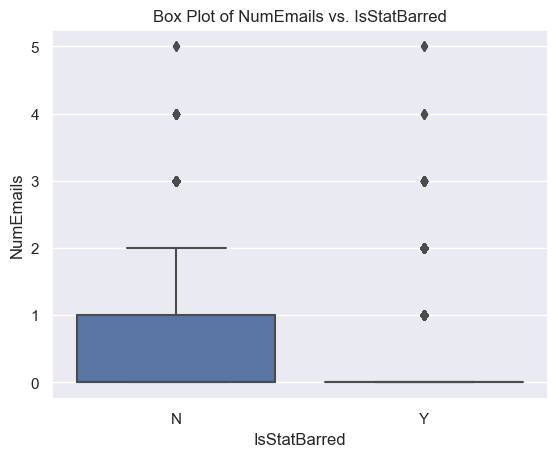

************************************************************************************************************************


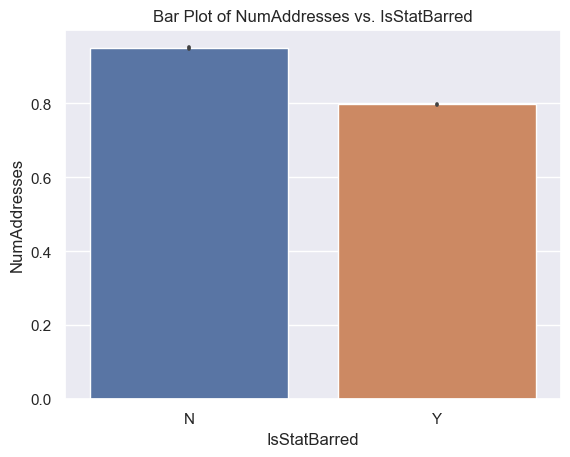

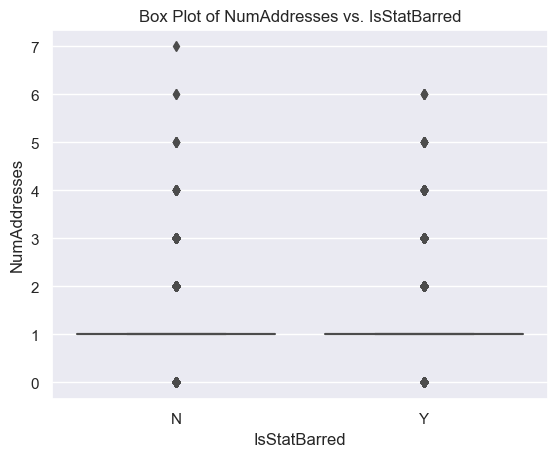

************************************************************************************************************************


In [41]:
for column in numerical_columns:
    # Create a bar plot for each numerical column against 'IsStatBarred'
    sns.barplot(x=df['IsStatBarred'], y=df[column], estimator=np.mean)
    
    # Add a title to the plot
    plt.title(f'Bar Plot of {column} vs. IsStatBarred')
    
    # Show the plot
    plt.show()
    
    # Create a box plot for each numerical column against 'IsStatBarred'
    sns.boxplot(x=df['IsStatBarred'], y=df[column])
    
    # Add a title to the box plot
    plt.title(f'Box Plot of {column} vs. IsStatBarred')
    
    # Show the box plot
    plt.show()
    
    print("*" * 120)

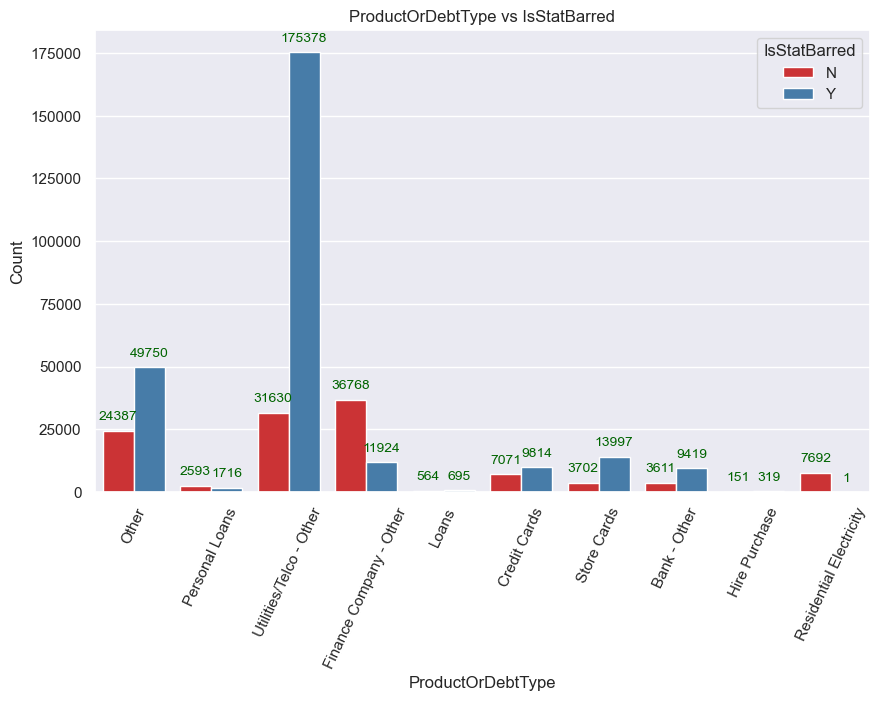

************************************************************************************************************************


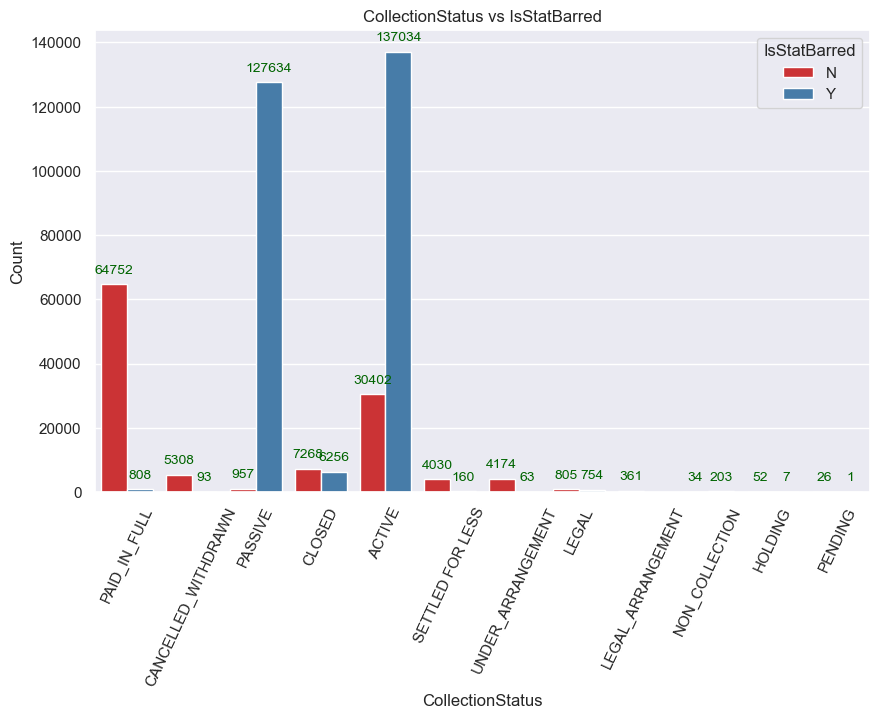

************************************************************************************************************************


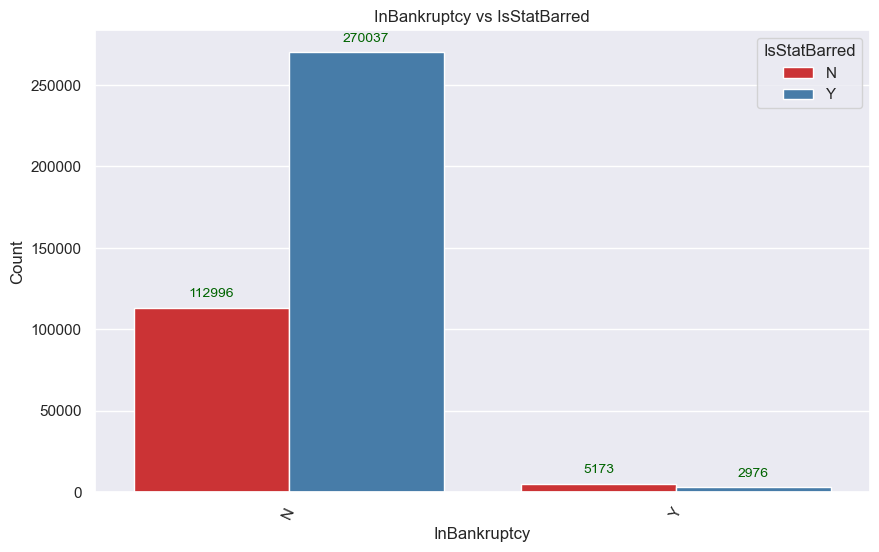

************************************************************************************************************************


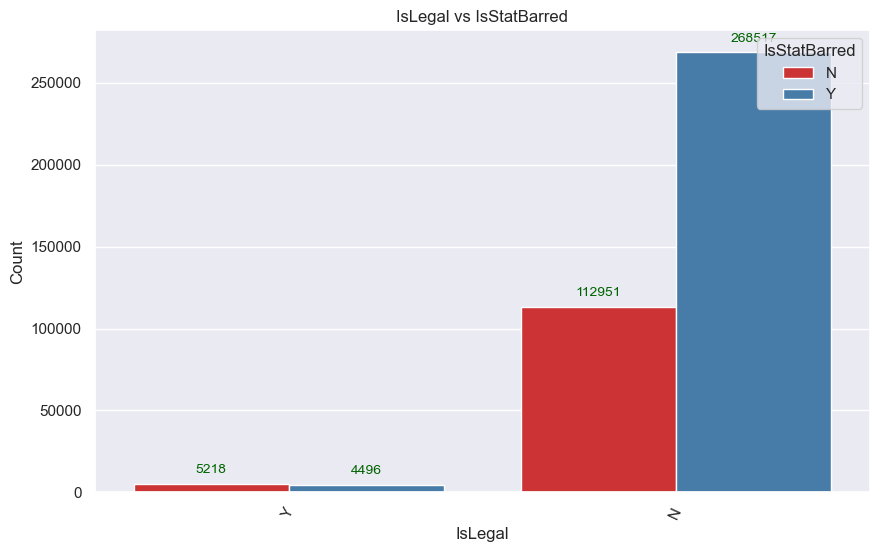

************************************************************************************************************************


In [42]:
# List of categorical columns (excluding "OriginalCreditor_Redacted" and "IsStatBarred")
categorical_columns = [col for col in df.columns if col not in ['OriginalCreditor_Redacted', 'IsStatBarred'] and df[col].dtype == 'object']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Create a grouped bar chart
    ax = sns.countplot(x=column, hue="IsStatBarred", data=df, palette="Set1")

    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"{column} vs IsStatBarred")

    plt.xticks(rotation=65)

    plt.legend(title="IsStatBarred", loc="upper right")
    
    # Add labels to the bars (rounded to integers, handling NaN)
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='center', fontsize=10, color='darkgreen', xytext=(0, 10),
                        textcoords='offset points')
    plt.show()
    
    print("*" * 120)

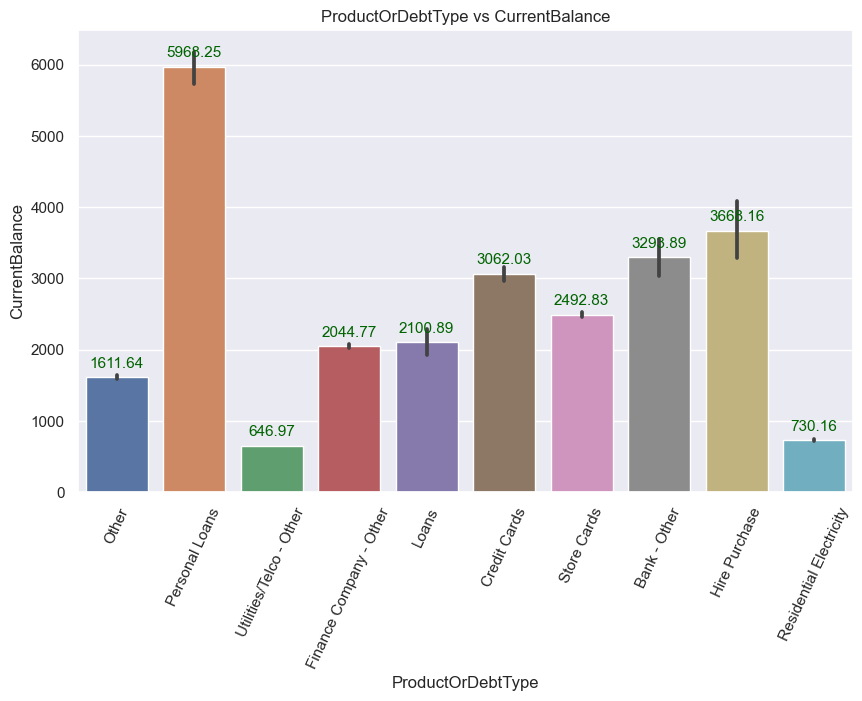

************************************************************************************************************************


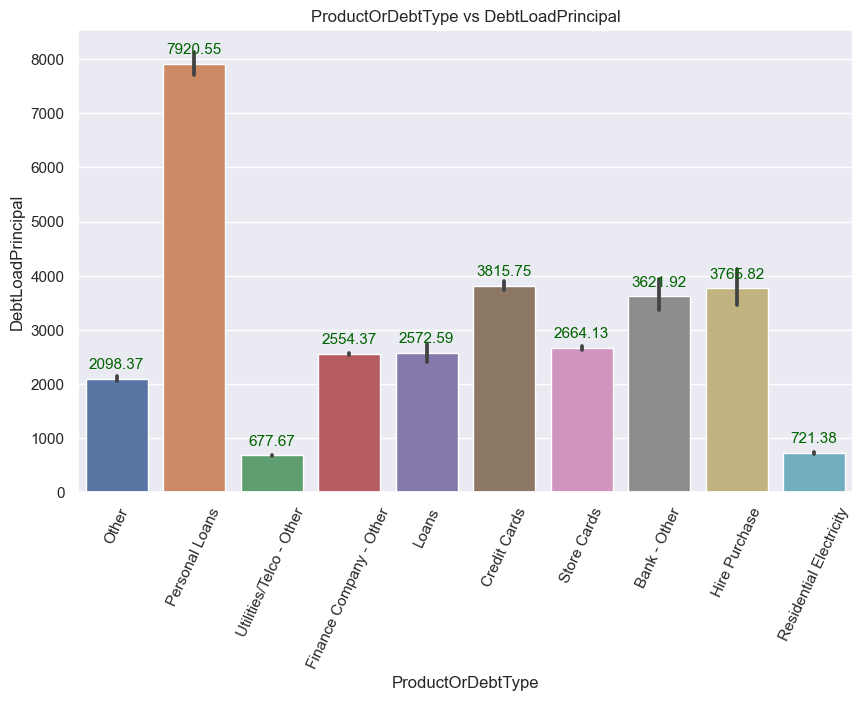

************************************************************************************************************************


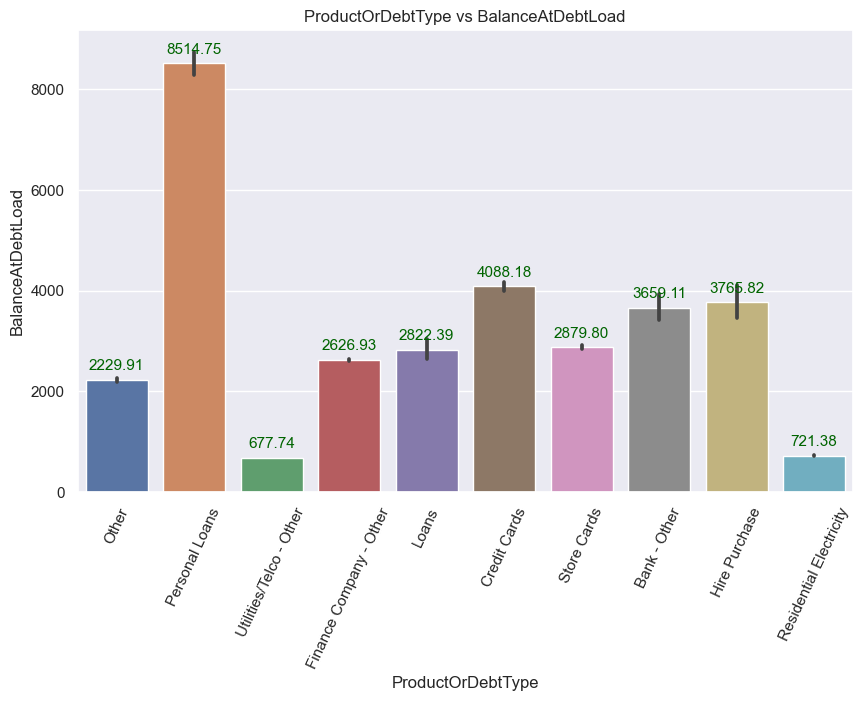

************************************************************************************************************************


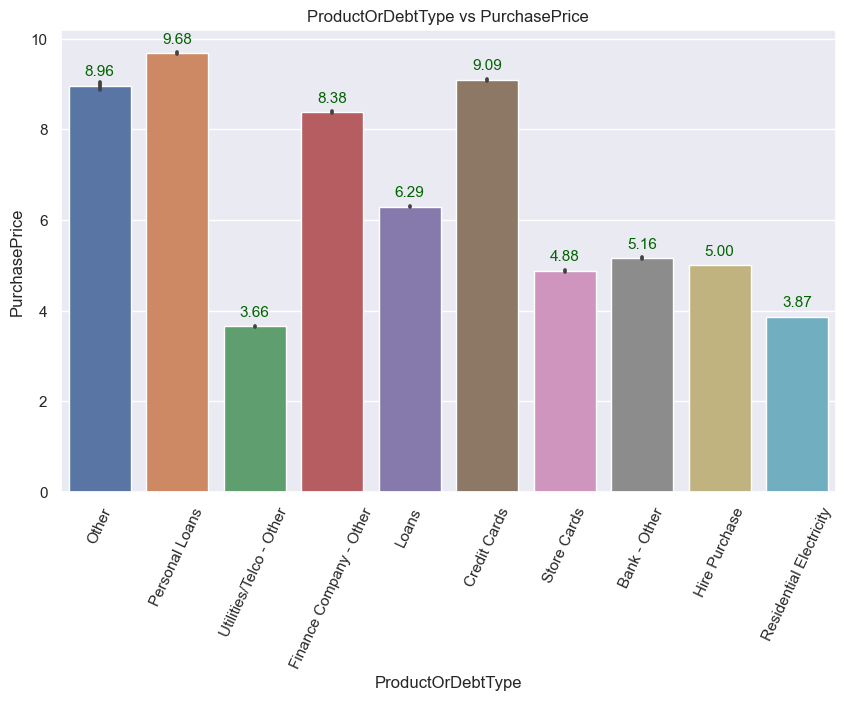

************************************************************************************************************************


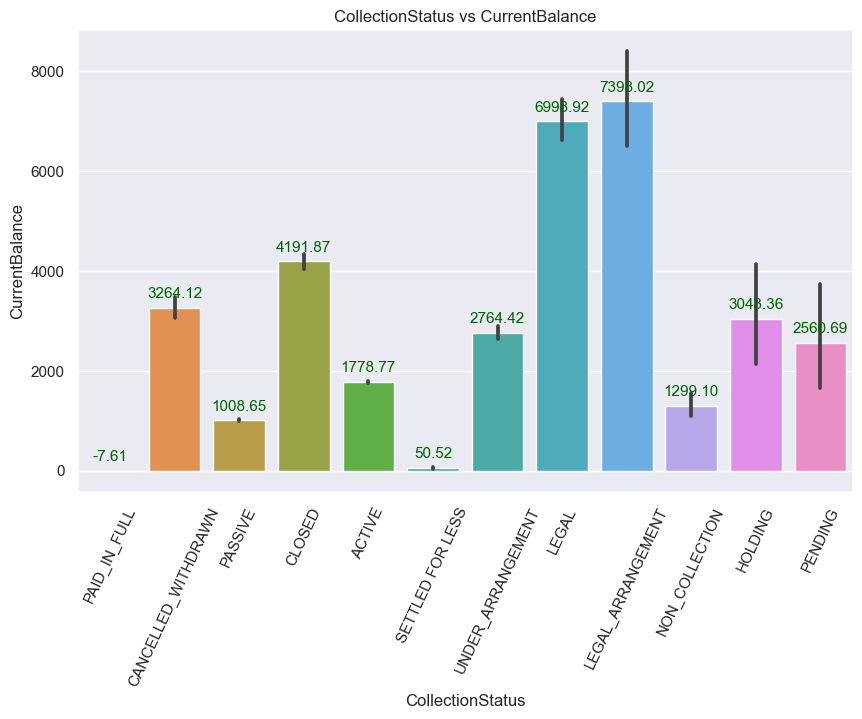

************************************************************************************************************************


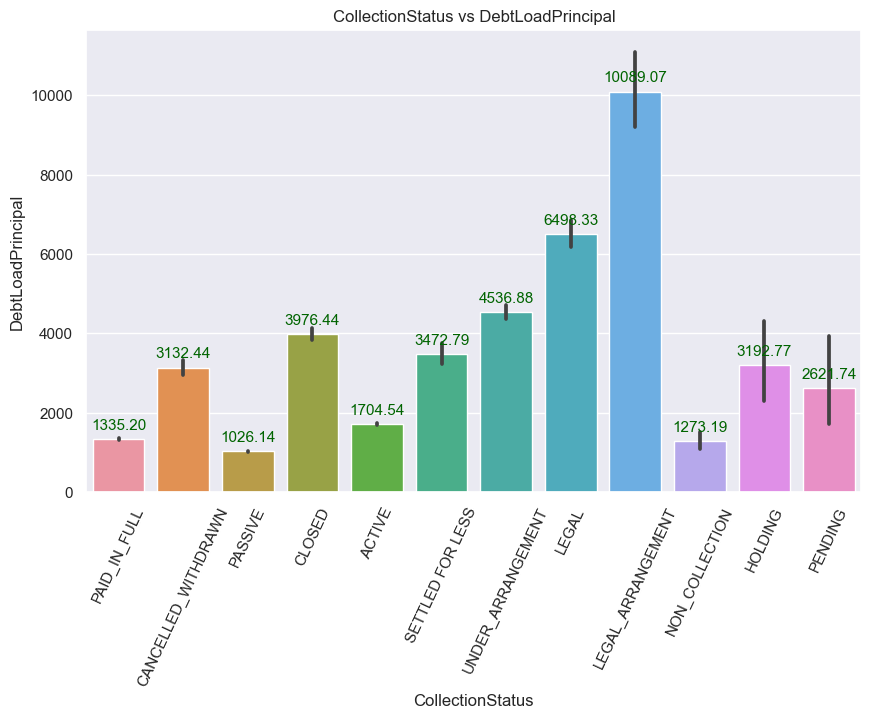

************************************************************************************************************************


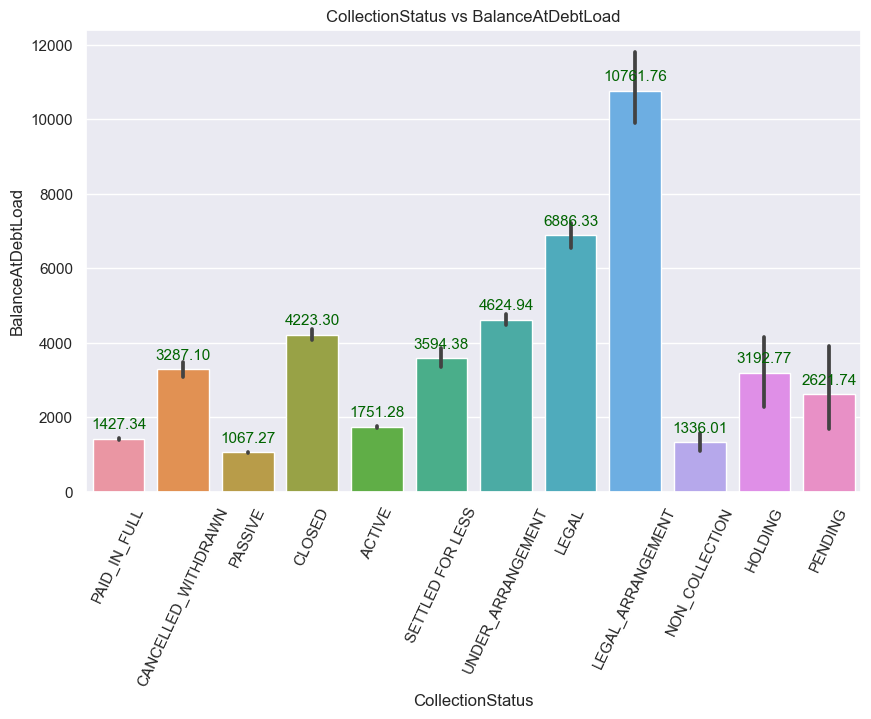

************************************************************************************************************************


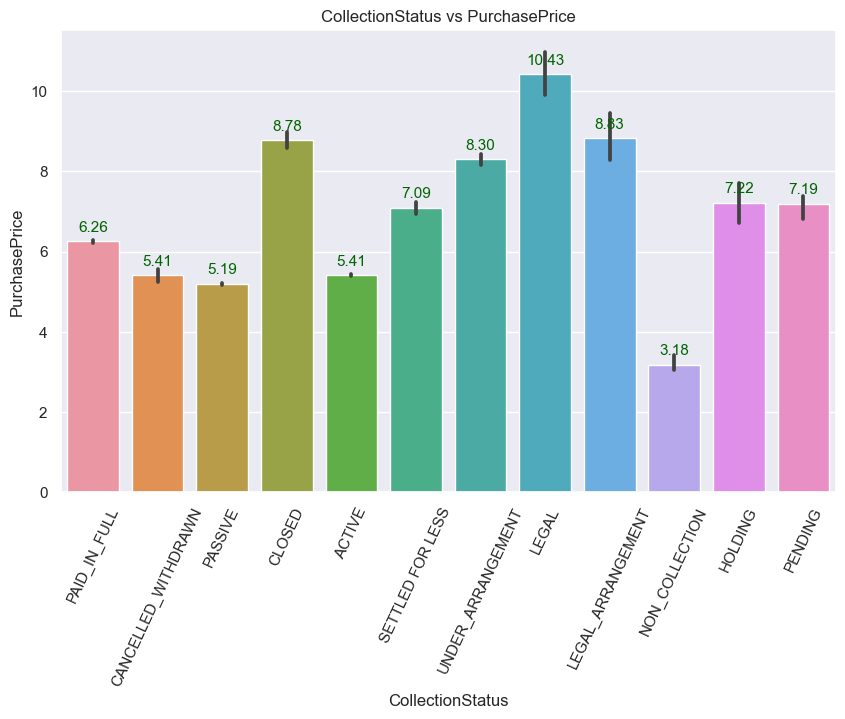

************************************************************************************************************************


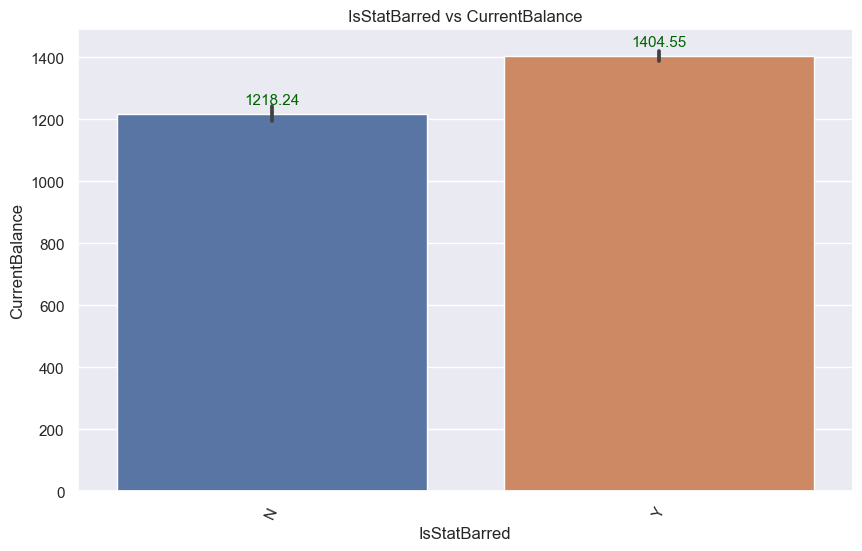

************************************************************************************************************************


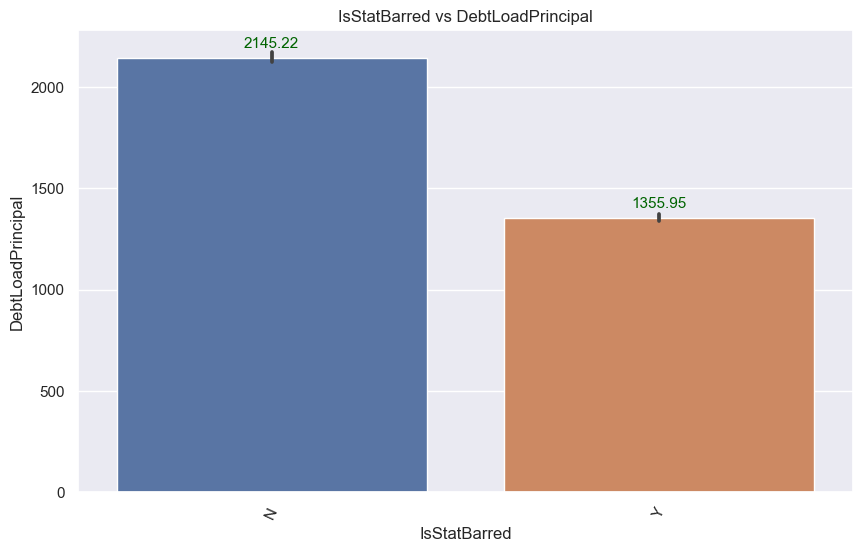

************************************************************************************************************************


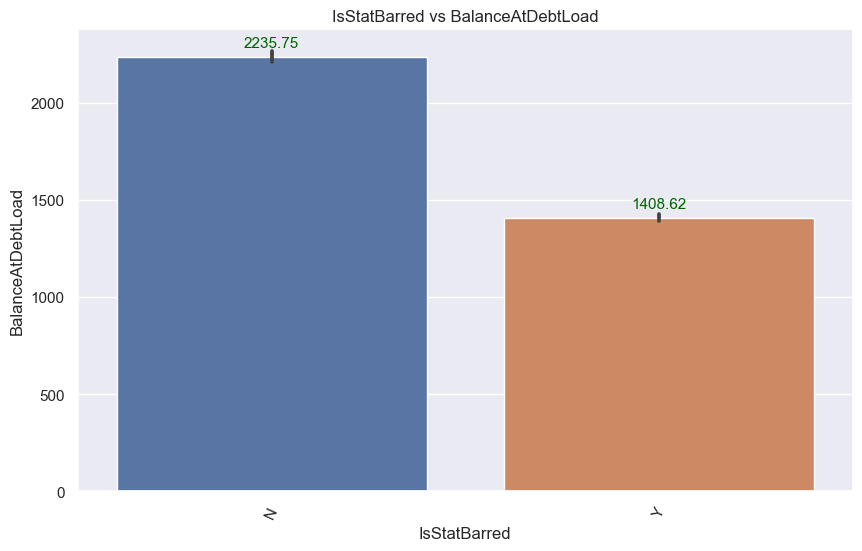

************************************************************************************************************************


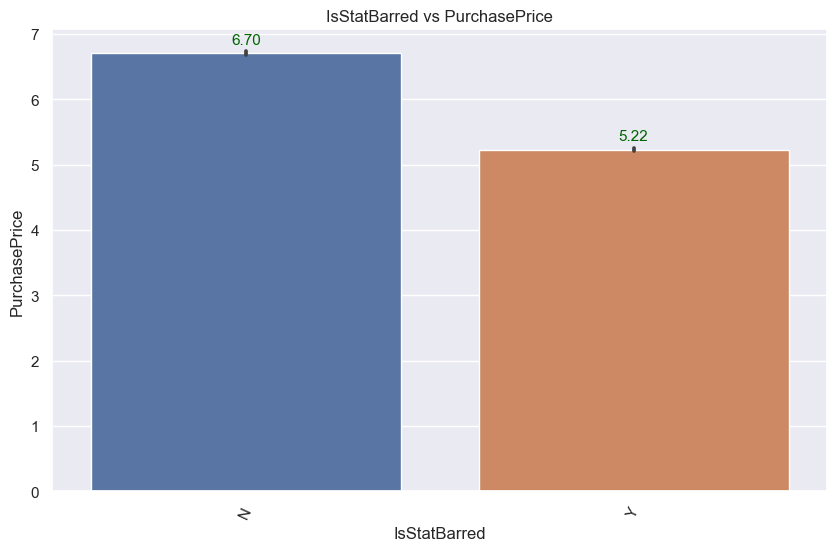

************************************************************************************************************************


In [43]:
categorical_columns = ['ProductOrDebtType','CollectionStatus', 'IsStatBarred']
# List of numerical columns
numerical_columns = ['CurrentBalance', 'DebtLoadPrincipal', 'BalanceAtDebtLoad', 'PurchasePrice']

# Iterate through each combination of categorical and numerical columns
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

        # Create a bar plot with "mean" estimator
        ax = sns.barplot(x=cat_col, y=num_col, data=df, estimator=np.mean)

        # Add labels and title
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.title(f"{cat_col} vs {num_col}")

        # Rotate x-axis labels for better readability (if needed)
        plt.xticks(rotation=65)
        
        # Add labels to the bars
        for p in ax.patches:
            ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='darkgreen', xytext=(0, 10),
                        textcoords='offset points')

        plt.show()
        
        print("*" * 120)

<AxesSubplot:xlabel='CustomerAge', ylabel='CurrentBalance'>

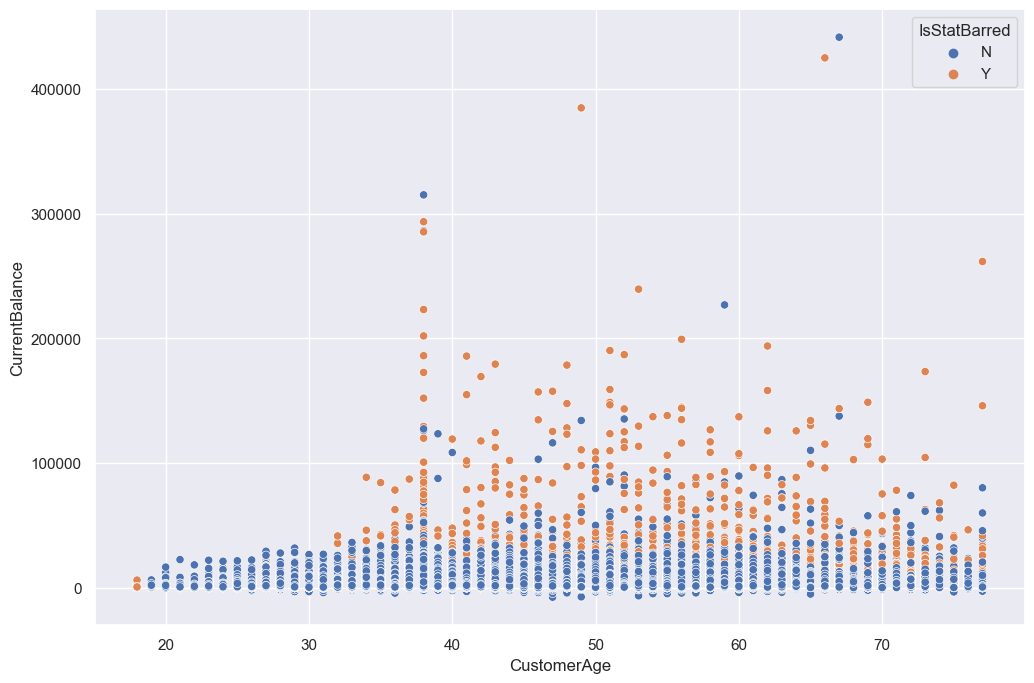

In [44]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['CustomerAge'], df['CurrentBalance'], hue=df['IsStatBarred'].astype('category'))

## CurrentBalance, DebtLoadPrincipal, BalanceAtDebtLoad :
- These columns have high skewness and kurtosis.
- Applying logarithmic transformation to make the distributions more symmetric.

In [45]:
df['CurrentBalance'] = np.log(df['CurrentBalance'] - df['CurrentBalance'].min() + 1) # CurrentBalance has some negative values.
df['DebtLoadPrincipal'] = np.log1p(df['DebtLoadPrincipal'])
df['BalanceAtDebtLoad'] = np.log1p(df['BalanceAtDebtLoad'])

### OriginalCreditor_Redacted has 52 unique values
### Performing frequency encoding
- 'FrequencyEncodedCreditor' column now contains values representing the frequency of each category in the 'OriginalCreditor_Redacted' column
- Categories that appear more frequently in the original column will have higher values in the new column, while categories that appear less frequently will have lower values.

In [46]:
# Calculate the frequency of each category
category_counts = df['OriginalCreditor_Redacted'].value_counts()

# Assign a value to each category based on its frequency
def frequency_encode(category):
    return category_counts[category] / len(df)

# Replace the original categorical values with the frequency encoded values
df['FrequencyEncodedCreditor'] = df['OriginalCreditor_Redacted'].apply(frequency_encode)

In [47]:
df[['OriginalCreditor_Redacted', 'FrequencyEncodedCreditor']]

,OriginalCreditor_Redacted,FrequencyEncodedCreditor
0,Creditor 1,0.000020
1,Creditor 2,0.000015
2,Creditor 1,0.000020
3,Creditor 2,0.000015
4,Creditor 1,0.000020
...,...,...
406418,Creditor 50,0.033841
406419,Creditor 50,0.033841
406420,Creditor 50,0.033841
406421,Creditor 50,0.033841


## Encoding Categorical Data using LabelEncoder

In this code, we use the `LabelEncoder` from scikit-learn to encode categorical data into numerical values. This is often necessary when preparing data for machine learning algorithms that require numeric input.

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['ProductOrDebtType'] = le.fit_transform(df['ProductOrDebtType'])
df['CollectionStatus'] = le.fit_transform(df['CollectionStatus'])
df['IsStatBarred'] = le.fit_transform(df['IsStatBarred'])
df['InBankruptcy'] = le.fit_transform(df['InBankruptcy'])
df['IsLegal'] = le.fit_transform(df['IsLegal'])

In [49]:
df.head()

,OriginalCreditor_Redacted,CurrentBalance,DebtLoadPrincipal,BalanceAtDebtLoad,PurchasePrice,ProductOrDebtType,CollectionStatus,IsStatBarred,InBankruptcy,IsLegal,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,FrequencyEncodedCreditor
0,Creditor 1,8.951336,7.057209,7.057209,4.22,5,7,0,0,1,1.0,53.0,0,0,1,0.000020
1,Creditor 2,8.974757,5.214392,5.214392,4.22,5,1,1,0,0,1.0,38.0,0,0,1,0.000015
2,Creditor 1,8.951336,6.290773,6.290773,4.22,5,7,0,0,0,1.0,38.0,1,0,1,0.000020
3,Creditor 2,9.680200,9.021659,9.021659,4.22,5,8,1,0,0,1.0,38.0,1,0,1,0.000015
4,Creditor 1,8.951336,6.261492,6.261492,4.22,5,7,1,0,1,1.0,46.0,2,0,1,0.000020


## Data Preparation: Splitting Features and Target

In this code, we perform a common step in data preparation for machine learning tasks: splitting the data into features (independent variables) and the target variable (dependent variable).

In [50]:
x = df.drop(['IsStatBarred', 'OriginalCreditor_Redacted'], axis=1)
y = df['IsStatBarred']

## Visualizing Feature Correlation with Heatmap

In this code, we use the `matplotlib` and `seaborn` libraries to create a heatmap that visualizes the correlation between features in our dataset.

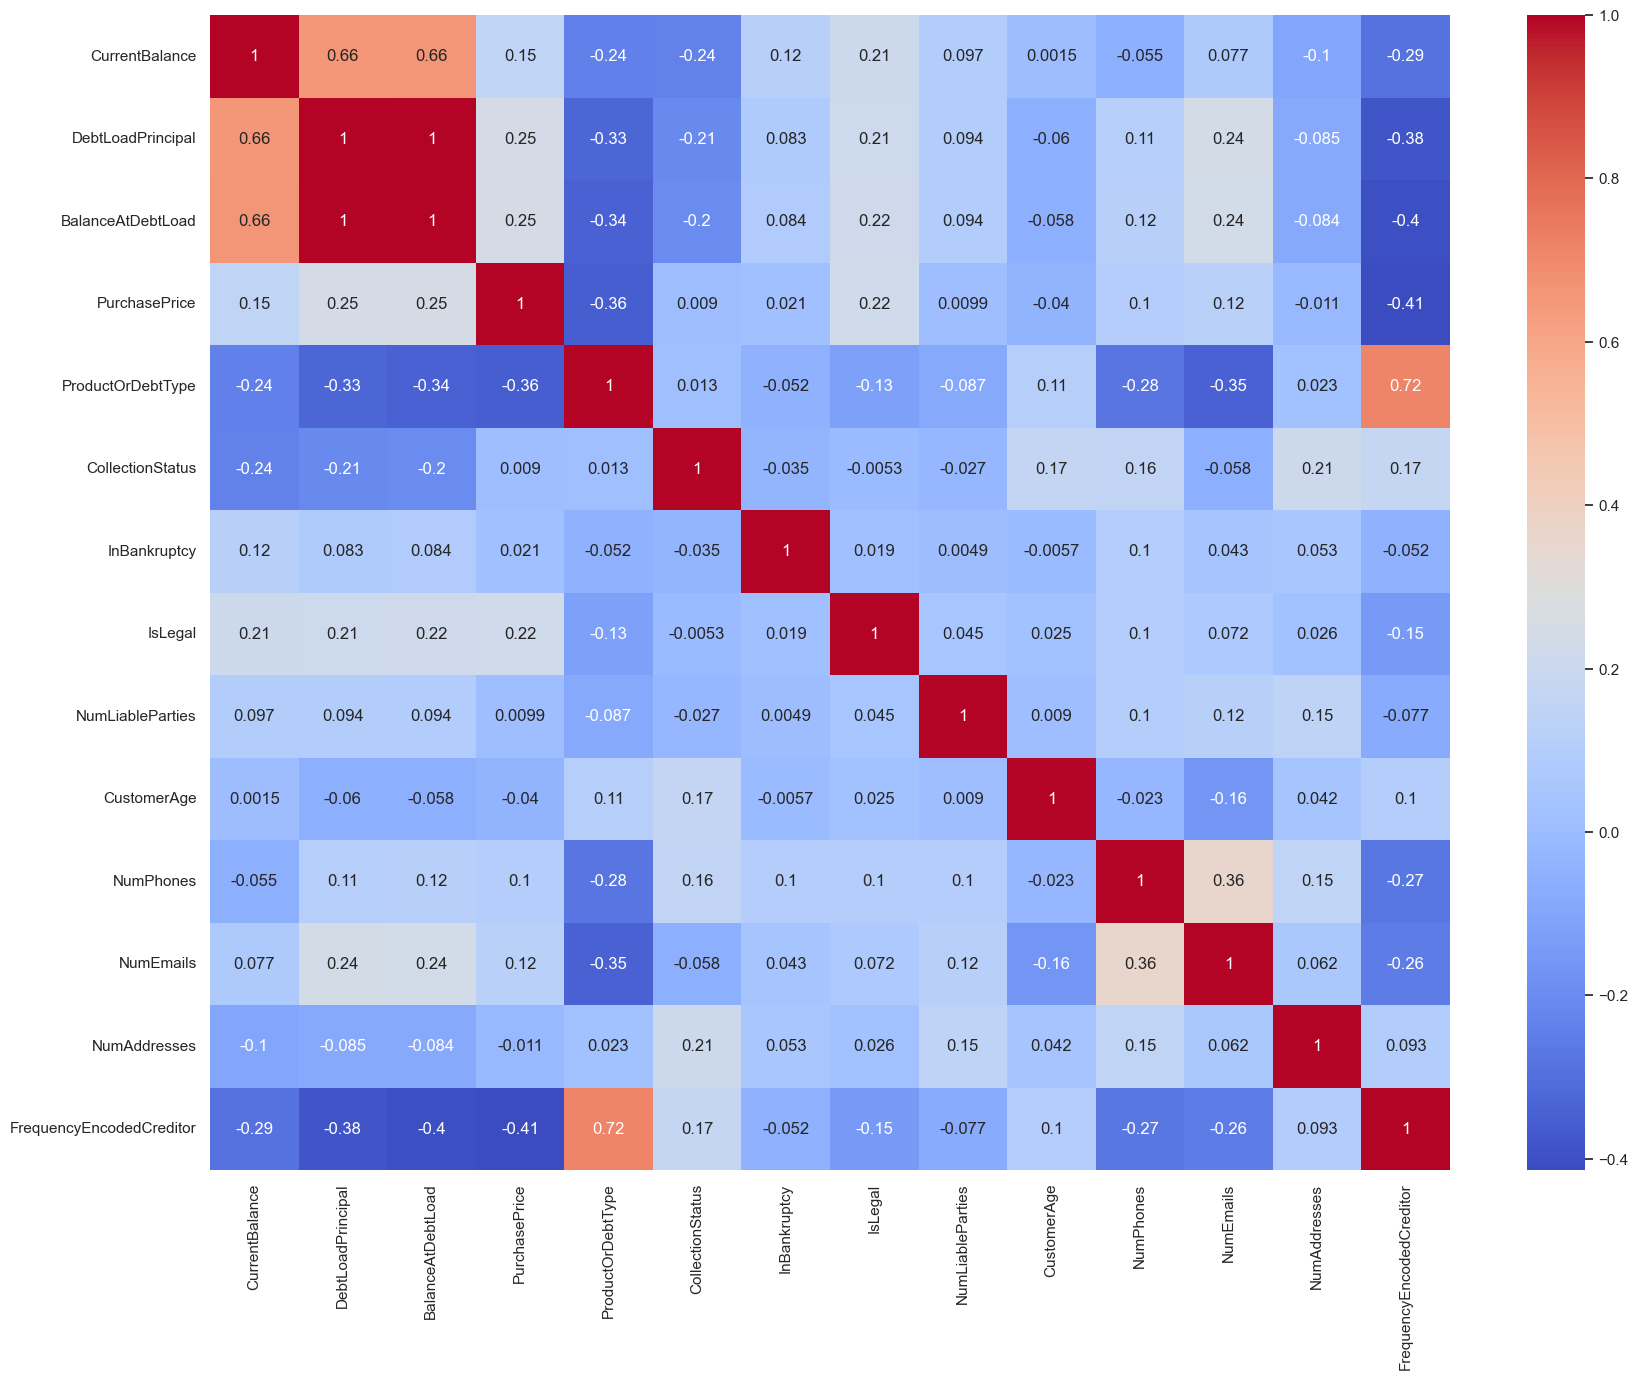

In [51]:
plt.figure(figsize=(20,15))
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')
plt.show()

### Removing  Feature BalanceAtDebtLoad to avoid multicollinearity.

In [52]:
x = x.drop(['BalanceAtDebtLoad'], axis=1)

## Standardizing Feature Data

- In this code, we use the `StandardScaler` from scikit-learn to standardize (scale) the feature data in our dataset. Standardization is an important preprocessing step in machine learning.

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(x)

## Calculating Variance Inflation Factor (VIF)

- In this code, we calculate the Variance Inflation Factor (VIF) for the features in our dataset. VIF is a measure that helps us assess the multicollinearity among features in a regression analysis. High VIF values can indicate that one or more features are highly correlated with others.

- If any of the VIF values are 10 or higher, then it is likely that multicollinearity is present.

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = x_sc
vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = x.columns
vif

,vif,Features
0,1.916186,CurrentBalance
1,2.017306,DebtLoadPrincipal
2,1.282206,PurchasePrice
3,2.273906,ProductOrDebtType
4,1.234257,CollectionStatus
5,1.031963,InBankruptcy
6,1.103636,IsLegal
7,1.054178,NumLiableParties
8,1.067292,CustomerAge
9,1.336308,NumPhones


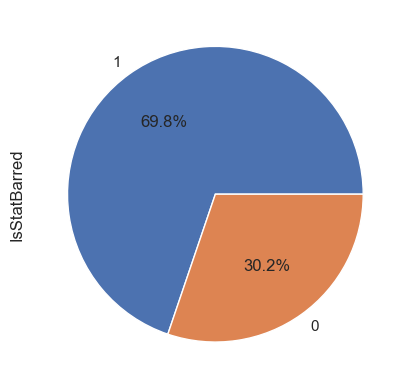

In [55]:
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

## Addressing Class Imbalance with SMOTE

- In this code, we address class imbalance in our classification dataset using Synthetic Minority Over-sampling Technique (SMOTE) from the `imbalanced-learn` (imblearn) library.

- Addressing class imbalance is essential for building fair and accurate classification models, as it prevents models from being biased toward the majority class.

- By applying SMOTE, we create a more balanced dataset, which can lead to better model performance, particularly for the minority class.

In [56]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_sc, y)
print(y.value_counts())
print()
print(y_smote.value_counts())

1    273013
0    118169
Name: IsStatBarred, dtype: int64

0    273013
1    273013
Name: IsStatBarred, dtype: int64


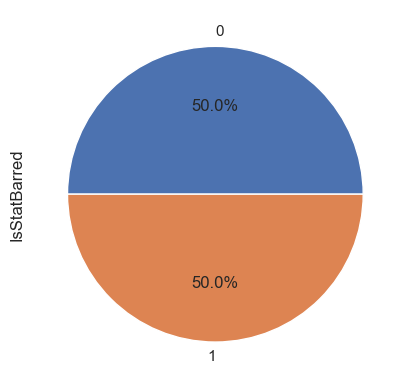

In [57]:
y_smote.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

### Splitting the data into Train and Test set

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=101)

In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(409519, 13)
(136507, 13)
(409519,)
(136507,)


## Importing Machine Learning Tools

In this code, we import various machine learning models, evaluation metrics, and utility functions that are essential for building, evaluating, and fine-tuning machine learning models.

### Machine Learning Models:

- LogisticRegression: A linear classification model.
- GaussianNB: A Gaussian Naive Bayes classifier for probabilistic classification.
- SVC: Support Vector Classifier for classification tasks.
- DecisionTreeClassifier: A decision tree-based classifier.
- RandomForestClassifier: A random forest ensemble classifier.
- AdaBoostClassifier: A classifier using AdaBoost boosting technique.
- GradientBoostingClassifier: A classifier using gradient boosting.
- XGBClassifier: XGBoost, a popular gradient boosting library for classification and regression tasks.

### Evaluation Metrics:

- Various metrics from `sklearn.metrics` like accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, auc, roc_auc_score for assessing model performance.

### Utility Functions:

- GridSearchCV: For hyperparameter tuning through grid search.
- cross_val_score: For performing cross-validation to assess model generalization performance.

These tools are essential for creating, evaluating, and fine-tuning machine learning models, and for generating performance metrics and visualizations to understand model behavior and effectiveness.


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score,roc_curve, auc, roc_auc_score

from sklearn.model_selection import GridSearchCV, cross_val_score

## Model Evaluation and Comparison

In this code, we evaluate and compare the performance of several machine learning algorithms on a classification task. The following steps are performed for each algorithm:

1. Cross-validation: The model is evaluated using cross-validation with 5-fold cross-validation on the test set to assess its generalization performance.

2. Training: The model is trained on the entire training dataset (`x_train` and `y_train`).

3. Predictions: Predictions are made on both the training and testing datasets.

4. Evaluation Metrics: The following evaluation metrics are calculated for each model:
   - Train Accuracy: The accuracy of the model on the training set.
   - Test Accuracy: The accuracy of the model on the test set.
   - Precision: Precision score, a measure of the model's ability to correctly identify positive cases.
   - Recall: Recall score, a measure of the model's ability to find all relevant instances.
   - F1 Score: The harmonic mean of precision and recall, providing a balanced measure.
   - ROC AUC: Receiver Operating Characteristic Area Under the Curve (ROC AUC) score.

5. Collection of Results: Evaluation results, including classification reports, and the calculated metrics are collected and stored in the `results_dataset`.

The code iterates through a set of machine learning algorithms, evaluating and comparing their performance on the classification task, and collecting the results for further analysis and comparison.


In [61]:
algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

results_dataset = []

for algorithm_name, model in algorithms.items():    
    # Use cross-validation to evaluate the model
    scores = cross_val_score(model, x_test, y_test, cv=5, scoring='accuracy')

    # Train the model on the entire training set
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Collect and print evaluation results
    results = {
        "classification Report Training" : classification_report(y_train, y_pred_train),
        "Classification Report Testing": classification_report(y_test, y_pred)
    }
    
    results1 = {
        "Algorithm Name": algorithm_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1score,
        "AUC": roc_auc
    }


    print(f"Evaluation Results for {algorithm_name}:")
    for key, value in results.items():
        if isinstance(value, (int, float)):
            print(f"{key}: {value:.4f}")
        else:
            print(f"{key}:\n{value}")

    print("*" * 80)
    results_dataset.append(results1)

Evaluation Results for Logistic Regression:
classification Report Training:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81    205018
           1       0.80      0.84      0.82    204501

    accuracy                           0.81    409519
   macro avg       0.82      0.81      0.81    409519
weighted avg       0.82      0.81      0.81    409519

Classification Report Testing:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81     67995
           1       0.80      0.84      0.82     68512

    accuracy                           0.81    136507
   macro avg       0.81      0.81      0.81    136507
weighted avg       0.81      0.81      0.81    136507

********************************************************************************
Evaluation Results for Gaussian Naive Bayes:
classification Report Training:
              precision    recall  f1-score   support

           0       0.83   

## Saving and Displaying Evaluation Results

In this code, we save the evaluation results of machine learning algorithms to a Pandas DataFrame and then to a CSV file for further analysis and sharing. The following steps are performed:

1. Create a DataFrame: A DataFrame is created from the list of dictionaries containing the evaluation results for each algorithm.

2. Set the Index: The 'Algorithm Name' is set as the index of the DataFrame, making it easier to access and analyze results for each algorithm.

3. Save to CSV: The DataFrame is saved to a CSV file named "results.csv," which can be used for later reference or sharing with others.

4. Display the DataFrame: The DataFrame is displayed in the Jupyter Notebook, allowing you to examine the evaluation results for each algorithm.

This code streamlines the process of collecting, storing, and sharing evaluation results, making it easier to compare and analyze the performance of different machine learning models.


In [62]:
# Create a DataFrame from the list of dictionaries
results_dataset = pd.DataFrame(results_dataset)

# Set the 'Algorithm Name' as the index
results_dataset.set_index('Algorithm Name', inplace=True)

# Save the DataFrame to a CSV file
results_dataset.to_csv("results.csv")

# Display the DataFrame
results_dataset


,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
Algorithm Name,,,,,,
Logistic Regression,0.814270,0.813079,0.796860,0.842290,0.818946,0.812968
Gaussian Naive Bayes,0.758893,0.757807,0.712789,0.866651,0.782226,0.757393
Decision Tree,0.999958,0.966815,0.965961,0.967991,0.966975,0.966810
Random Forest,0.999946,0.975716,0.974305,0.977391,0.975845,0.975709
AdaBoost,0.949179,0.949197,0.944067,0.955380,0.949690,0.949173
Gradient Boosting,0.957169,0.956720,0.951558,0.962780,0.957136,0.956697
XGBoost,0.979994,0.977005,0.973422,0.980967,0.977180,0.976990


#### Different machine learning algorithms have been evaluated on the classification task. The Decision Tree, Random Forest, AdaBoost, Gradient Boosting, and XGBoost models appear to perform well with high accuracy and well-balanced precision, recall, F1 score, and AUC. Logistic Regression also shows good overall performance, while Gaussian Naive Bayes has slightly lower precision and F1 score but excels in recall.

### XGBoost: Performs well with nearly 98% accuracy on the training set and around 98% on the test set. It has high precision, recall, F1 score, and AUC, suggesting a robust model.

## Final Model
### Using XGBOOST and creating final model

Accuracy Score: 0.9770048422425224
--------------------------------------------------------------------------------
Classification Report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     67995
           1       0.97      0.98      0.98     68512

    accuracy                           0.98    136507
   macro avg       0.98      0.98      0.98    136507
weighted avg       0.98      0.98      0.98    136507

--------------------------------------------------------------------------------
Confusion Matrix:


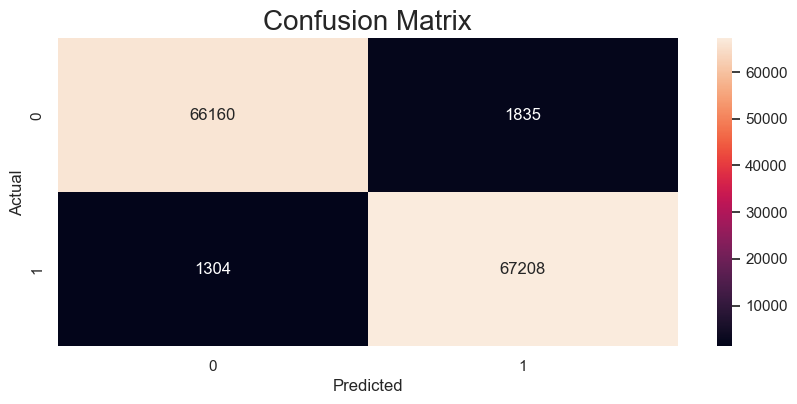

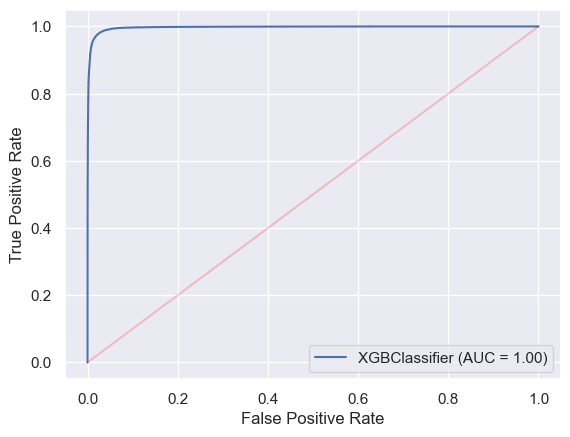

In [63]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
print('----'*20)
print(f"Classification Report\n {classification_report(y_test, y_pred)}")
print('----'*20)
print(f"Confusion Matrix:")
plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f');
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix', fontsize=20) 
plt.show()

# Roc, AUC score
y_score1 = xgb.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_score1)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name="XGBClassifier")
display.plot()
plt.plot(np.linspace(0,1),np.linspace(0,1), color="red", alpha=0.2)
plt.show()